<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled285.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np

# -----------------------------
# Organism definition
# -----------------------------
class Organism:
    def __init__(self):
        # Genetic health: 0 (fragile) → 1 (robust)
        self.genetic_health = float(np.clip(random.gauss(0.7, 0.1), 0, 1))

        # Epigenetic bias: short-term modulation (small, can be +/-)
        self.epigenetic_bias = random.uniform(-0.05, 0.05)

        # Effort: training vs sloth (0 → 1)
        self.effort = random.uniform(0, 1)

    def effective_fitness(self) -> float:
        # Simple proxy: genetics + epigenetics + effort contribution
        return float(np.clip(self.genetic_health + self.epigenetic_bias + 0.2 * self.effort, 0, 1))


# -----------------------------
# Four "masters" as regime parameters
# -----------------------------
# Interpretations (kept minimal, but explicit):
# - Arrhenius: noise-driven threshold crossing; weak coupling to competence (low selection, high buffering)
# - Arrhenius–Marcus: better "cost accounting" via a fitness-modulated survival component (moderate selection/buffering)
# - Arrhenius–Warshel: strong infrastructure/protection; persistence decoupled from competence (very low selection, very high buffering)
# - GQR: selection-complete; tight coupling between competence and persistence (high selection, low buffering)
REGIMES = {
    "arrhenius": {
        "selection_strength": 0.2,
        "buffering": 0.8,
    },
    "arrhenius_marcus": {
        "selection_strength": 0.5,
        "buffering": 0.3,
    },
    "arrhenius_warshel": {
        "selection_strength": 0.1,
        "buffering": 0.9,
    },
    "gqr": {
        "selection_strength": 0.8,
        "buffering": 0.1,
    },
}


# -----------------------------
# Simulation step
# -----------------------------

def run_simulation(regime_name: str, generations: int = 200, initial_pop: int = 200, collapse_pop_threshold: int = 20):
    population = [Organism() for _ in range(initial_pop)]
    history = []

    MAX_POP = 2000  # start smaller for speed

    for gen in range(generations):
        population = simulate_generation(population, regime_name)

        # Cap AFTER the new generation is created
        if len(population) > MAX_POP:
            population = random.sample(population, MAX_POP)

        if len(population) == 0:
            history.append((gen, 0, 0.0))
            break

        avg_health = float(np.mean([o.genetic_health for o in population]))
        history.append((gen, len(population), avg_health))

        if len(population) < collapse_pop_threshold:
            break

    return history

# -----------------------------
# Run experiment
# -----------------------------
def run_simulation(regime_name: str, generations: int = 200, initial_pop: int = 200, collapse_pop_threshold: int = 20):
    population = [Organism() for _ in range(initial_pop)]
    history = []

    for gen in range(generations):
        population = simulate_generation(population, regime_name)

        if len(population) == 0:
            history.append((gen, 0, 0.0))
            break

        avg_health = float(np.mean([o.genetic_health for o in population]))
        history.append((gen, len(population), avg_health))

        if len(population) < collapse_pop_threshold:
            break

    return history


# -----------------------------
# Execute all regimes and print summary
# -----------------------------
results = {name: run_simulation(name) for name in REGIMES.keys()}

for name, hist in results.items():
    gen, pop, avg_health = hist[-1]
    print(f"{name:18s} | generations={gen:3d} | pop={pop:4d} | avg_health={avg_health:.3f}")

KeyboardInterrupt: 

In [ ]:
import random
import numpy as np

# -----------------------------
# Organism definition
# -----------------------------
class Organism:
    def __init__(self):
        self.genetic_health = float(np.clip(random.gauss(0.7, 0.1), 0, 1))
        self.epigenetic_bias = random.uniform(-0.05, 0.05)
        self.effort = random.uniform(0, 1)

    def effective_fitness(self) -> float:
        return float(np.clip(self.genetic_health + self.epigenetic_bias + 0.2 * self.effort, 0, 1))


# -----------------------------
# Four "masters" as regime parameters
# -----------------------------
REGIMES = {
    "arrhenius": {"selection_strength": 0.2, "buffering": 0.8},
    "arrhenius_marcus": {"selection_strength": 0.5, "buffering": 0.3},
    "arrhenius_warshel": {"selection_strength": 0.1, "buffering": 0.9},
    "gqr": {"selection_strength": 0.8, "buffering": 0.1},
}

# -----------------------------
# Simulation step
# -----------------------------
def simulate_generation(population, regime_name: str):
    params = REGIMES[regime_name]
    next_population = []

    for org in population:
        fitness = org.effective_fitness()

        survival_prob = params["buffering"] + params["selection_strength"] * fitness
        survival_prob = float(np.clip(survival_prob, 0, 1))

        if random.random() < survival_prob:
            reproduction_prob = float(np.clip(fitness, 0, 1))

            if random.random() < reproduction_prob:
                child = Organism()
                mutation = random.gauss(0, 0.05)
                child.genetic_health = float(np.clip(org.genetic_health + mutation, 0, 1))
                child.epigenetic_bias = 0.5 * org.epigenetic_bias
                next_population.append(child)

            next_population.append(org)

    return next_population


# -----------------------------
# Run experiment
# -----------------------------
def run_simulation(
    regime_name: str,
    generations: int = 200,
    initial_pop: int = 200,
    collapse_pop_threshold: int = 20,
    max_pop: int = 2000,
):
    population = [Organism() for _ in range(initial_pop)]
    history = []

    for gen in range(generations):
        population = simulate_generation(population, regime_name)

        # Cap AFTER the new generation is created
        if len(population) > max_pop:
            population = random.sample(population, max_pop)

        if len(population) == 0:
            history.append((gen, 0, 0.0))
            break

        avg_health = float(np.mean([o.genetic_health for o in population]))
        history.append((gen, len(population), avg_health))

        if len(population) < collapse_pop_threshold:
            break

    return history


# -----------------------------
# Execute all regimes and print summary
# -----------------------------
results = {name: run_simulation(name) for name in REGIMES.keys()}

for name, hist in results.items():
    gen, pop, avg_health = hist[-1]
    print(f"{name:18s} | generations={gen:3d} | pop={pop:4d} | avg_health={avg_health:.3f}")

arrhenius          | generations=199 | pop=2000 | avg_health=0.911
arrhenius_marcus   | generations=199 | pop=2000 | avg_health=0.922
arrhenius_warshel  | generations=199 | pop=2000 | avg_health=0.901
gqr                | generations=199 | pop=2000 | avg_health=0.925



=== Running arrhenius (1/4) ===
[arrhenius] gen=   0/99999 pop= 315 avg_health=0.713 var=0.0125 elapsed=0.0s
[arrhenius] gen= 100/99999 pop= 941 avg_health=0.893 var=0.0126 elapsed=0.0s
[arrhenius] gen= 200/99999 pop= 960 avg_health=0.891 var=0.0143 elapsed=0.1s
[arrhenius] gen= 300/99999 pop= 933 avg_health=0.874 var=0.0184 elapsed=0.1s
[arrhenius] gen= 400/99999 pop= 955 avg_health=0.891 var=0.0139 elapsed=0.1s
[arrhenius] gen= 500/99999 pop= 945 avg_health=0.888 var=0.0152 elapsed=0.2s
[arrhenius] gen= 600/99999 pop= 932 avg_health=0.889 var=0.0130 elapsed=0.2s
[arrhenius] gen= 700/99999 pop= 949 avg_health=0.890 var=0.0138 elapsed=0.3s
[arrhenius] gen= 800/99999 pop= 932 avg_health=0.886 var=0.0131 elapsed=0.4s
[arrhenius] gen= 900/99999 pop= 925 avg_health=0.893 var=0.0137 elapsed=0.5s
[arrhenius] gen=1000/99999 pop= 908 avg_health=0.894 var=0.0125 elapsed=0.5s
[arrhenius] gen=1100/99999 pop= 936 avg_health=0.884 var=0.0149 elapsed=0.5s
[arrhenius] gen=1200/99999 pop= 880 avg_hea

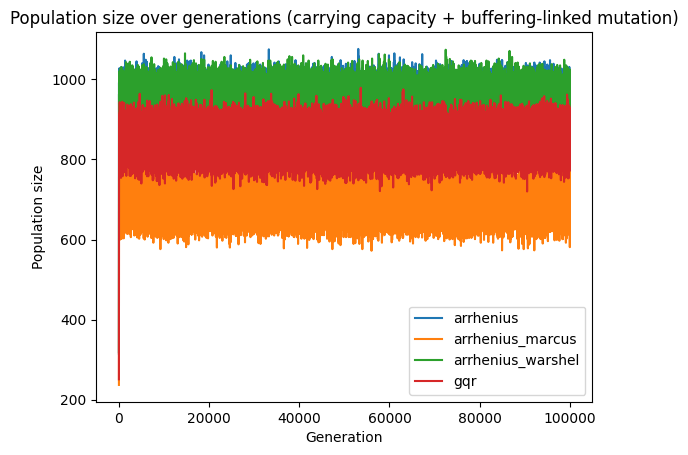

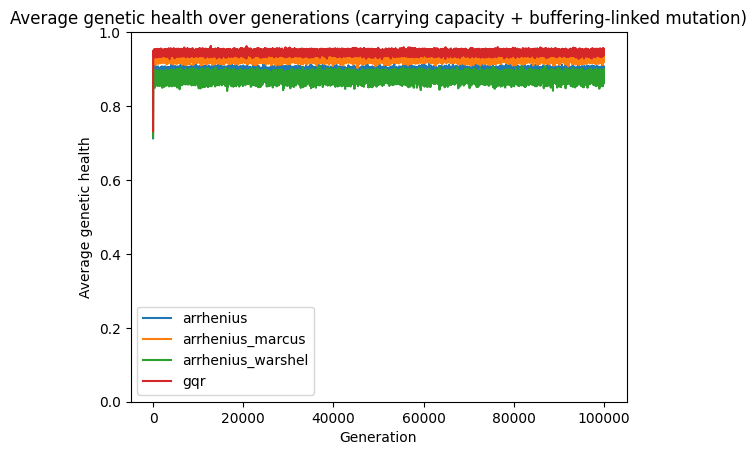

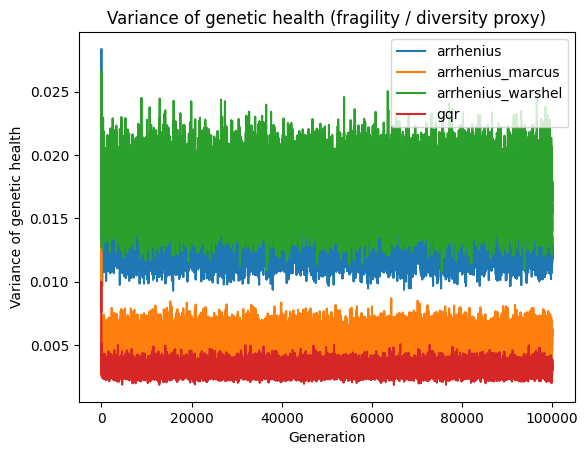


Final summary:
arrhenius          | gen=99999 | pop= 963 | avg_health=0.896 | var=0.0122
arrhenius_marcus   | gen=99999 | pop= 654 | avg_health=0.920 | var=0.0062
arrhenius_warshel  | gen=99999 | pop= 889 | avg_health=0.877 | var=0.0160
gqr                | gen=99999 | pop= 917 | avg_health=0.943 | var=0.0030


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# -----------------------------
# Four "masters" (regimes)
# -----------------------------
REGIMES = {
    "arrhenius": {"selection_strength": 0.2, "buffering": 0.8},
    "arrhenius_marcus": {"selection_strength": 0.5, "buffering": 0.3},
    "arrhenius_warshel": {"selection_strength": 0.1, "buffering": 0.9},
    "gqr": {"selection_strength": 0.8, "buffering": 0.1},
}

# Standard distinct colors (Matplotlib-like defaults)
COLORS = {
    "arrhenius": "#1f77b4",          # blue
    "arrhenius_marcus": "#ff7f0e",   # orange
    "arrhenius_warshel": "#2ca02c",  # green
    "gqr": "#d62728",                # red
}

# -----------------------------
# Population initialisation
# -----------------------------
def init_population(n, rng):
    genetic_health = np.clip(rng.normal(0.7, 0.1, size=n), 0, 1)
    epigenetic_bias = rng.uniform(-0.05, 0.05, size=n)
    effort = rng.uniform(0, 1, size=n)
    return genetic_health, epigenetic_bias, effort

# -----------------------------
# One generation (array-based, fast)
# -----------------------------
def simulate_generation(
    genetic_health,
    epigenetic_bias,
    effort,
    regime_name,
    rng,
    carrying_capacity=2000,
    base_mutation_sigma=0.03,
    extra_mutation_sigma=0.08,   # multiplied by buffering (gene-mangling channel)
    effort_benefit=0.2,
    effort_cost=0.1,             # makes training non-free
):
    sel = REGIMES[regime_name]["selection_strength"]
    buf = REGIMES[regime_name]["buffering"]

    # Fitness proxy (bounded)
    fitness = np.clip(genetic_health + epigenetic_bias + effort_benefit * effort - effort_cost * effort, 0, 1)

    # Survival probability (governance)
    survival_prob = np.clip(buf + sel * fitness, 0, 1)

    # Ecological (density) pressure: as pop approaches capacity, survival is penalised
    density = genetic_health.size / carrying_capacity
    survival_prob *= max(0.0, 1.0 - density)
    survival_prob = np.clip(survival_prob, 0, 1)

    survivors = rng.random(size=genetic_health.size) < survival_prob
    gh_s = genetic_health[survivors]
    eb_s = epigenetic_bias[survivors]
    ef_s = effort[survivors]
    fit_s = fitness[survivors]

    if gh_s.size == 0:
        return gh_s, eb_s, ef_s

    # Reproduction probability tied to fitness (simple)
    repro = rng.random(size=gh_s.size) < fit_s
    gh_p = gh_s[repro]
    eb_p = eb_s[repro]

    n_children = gh_p.size
    if n_children > 0:
        # Mutation load increases with buffering (civilisation "gene mangling")
        mutation_sigma = base_mutation_sigma + extra_mutation_sigma * buf
        mutation = rng.normal(0.0, mutation_sigma, size=n_children)

        child_gh = np.clip(gh_p + mutation, 0, 1)
        child_eb = 0.5 * eb_p               # weak epigenetic carryover
        child_ef = rng.uniform(0, 1, size=n_children)  # new effort each generation

        gh_next = np.concatenate([gh_s, child_gh])
        eb_next = np.concatenate([eb_s, child_eb])
        ef_next = np.concatenate([ef_s, child_ef])
    else:
        gh_next, eb_next, ef_next = gh_s, eb_s, ef_s

    return gh_next, eb_next, ef_next

# -----------------------------
# Run a regime with progress updates
# -----------------------------
def run_regime(
    regime_name,
    generations=100000,
    initial_pop=200,
    carrying_capacity=2000,
    collapse_threshold=20,
    seed=123,
    update_every=100,
):
    rng = np.random.default_rng(seed)
    gh, eb, ef = init_population(initial_pop, rng)

    gens = []
    pops = []
    avg_healths = []
    var_healths = []

    t0 = time.time()
    for gen in range(generations):
        gh, eb, ef = simulate_generation(
            gh, eb, ef, regime_name, rng, carrying_capacity=carrying_capacity
        )

        n = gh.size
        if n == 0:
            gens.append(gen)
            pops.append(0)
            avg_healths.append(0.0)
            var_healths.append(0.0)
            print(f"[{regime_name}] gen={gen:4d} pop=0 avg_health=0.000 (extinct)")
            break

        gens.append(gen)
        pops.append(int(n))
        avg_healths.append(float(gh.mean()))
        var_healths.append(float(gh.var()))

        if (gen % update_every) == 0 or gen == generations - 1:
            dt = time.time() - t0
            print(f"[{regime_name}] gen={gen:4d}/{generations-1} pop={n:4d} avg_health={avg_healths[-1]:.3f} var={var_healths[-1]:.4f} elapsed={dt:.1f}s")

        if n < collapse_threshold:
            print(f"[{regime_name}] gen={gen:4d} pop<{collapse_threshold} (collapse threshold reached)")
            break

    return np.array(gens), np.array(pops), np.array(avg_healths), np.array(var_healths)

# -----------------------------
# Run all four
# -----------------------------
generations = 100000
initial_pop = 200
carrying_capacity = 2000
update_every = 100

results = {}
for i, name in enumerate(REGIMES.keys(), start=1):
    print(f"\n=== Running {name} ({i}/{len(REGIMES)}) ===")
    results[name] = run_regime(
        name,
        generations=generations,
        initial_pop=initial_pop,
        carrying_capacity=carrying_capacity,
        seed=123,
        update_every=update_every,
    )

# -----------------------------
# Plot population
# -----------------------------
plt.figure()
for name, (g, p, h, v) in results.items():
    plt.plot(g, p, label=name, color=COLORS[name])
plt.xlabel("Generation")
plt.ylabel("Population size")
plt.title("Population size over generations (carrying capacity + buffering-linked mutation)")
plt.legend()
plt.show()

# -----------------------------
# Plot average genetic health
# -----------------------------
plt.figure()
for name, (g, p, h, v) in results.items():
    plt.plot(g, h, label=name, color=COLORS[name])
plt.xlabel("Generation")
plt.ylabel("Average genetic health")
plt.ylim(0, 1)
plt.title("Average genetic health over generations (carrying capacity + buffering-linked mutation)")
plt.legend()
plt.show()

# -----------------------------
# Plot variance (fragility indicator)
# -----------------------------
plt.figure()
for name, (g, p, h, v) in results.items():
    plt.plot(g, v, label=name, color=COLORS[name])
plt.xlabel("Generation")
plt.ylabel("Variance of genetic health")
plt.title("Variance of genetic health (fragility / diversity proxy)")
plt.legend()
plt.show()

# -----------------------------
# Final summary
# -----------------------------
print("\nFinal summary:")
for name, (g, p, h, v) in results.items():
    print(f"{name:18s} | gen={int(g[-1]):4d} | pop={int(p[-1]):4d} | avg_health={float(h[-1]):.3f} | var={float(v[-1]):.4f}")

In [ ]:
import numpy as np

# Save results to NPZ
np.savez(
    "gqr_civilisation_simulation_100k.npz",
    **{
        f"{name}_gens": g,
        f"{name}_pop": p,
        f"{name}_avg_health": h,
        f"{name}_var_health": v
        for name, (g, p, h, v) in results.items()
    }
)

print("Saved: gqr_civilisation_simulation_100k.npz")

SyntaxError: invalid syntax (ipython-input-2868682775.py, line 11)

In [ ]:
save_dict = {}

for name, (g, p, h, v) in results.items():
    save_dict[f"{name}_gens"] = g
    save_dict[f"{name}_pop"] = p
    save_dict[f"{name}_avg_health"] = h
    save_dict[f"{name}_var_health"] = v

In [ ]:
np.savez("gqr_civilisation_simulation_100k.npz", **save_dict)
print("Saved: gqr_civilisation_simulation_100k.npz")

Saved: gqr_civilisation_simulation_100k.npz


gen  year         arrhenius  arrhenius_marcus  arrhenius_warshel               gqr   |        arrhenius  arrhenius_marcus  arrhenius_warshel               gqr
  0  1800               542               388               540               409   |            0.712             0.718             0.697             0.718
  1  1820               701               336               693               422   |            0.719             0.730             0.703             0.733
  2  1840               913               305               889               414   |            0.735             0.751             0.709             0.754
  3  1860              1092               290              1023               398   |            0.743             0.766             0.721             0.773
  4  1880              1246               262              1095               375   |            0.751             0.774             0.727             0.790
  5  1900              1347               188           

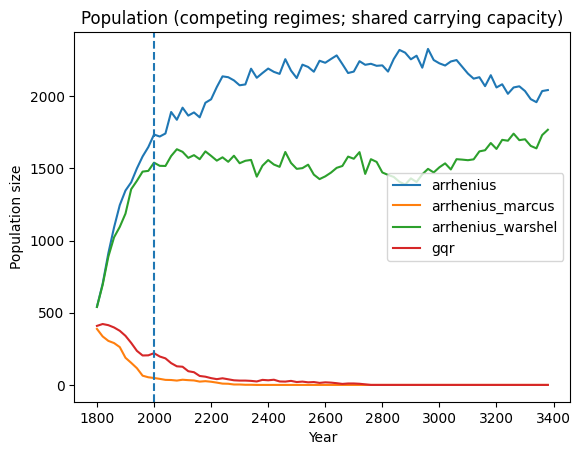

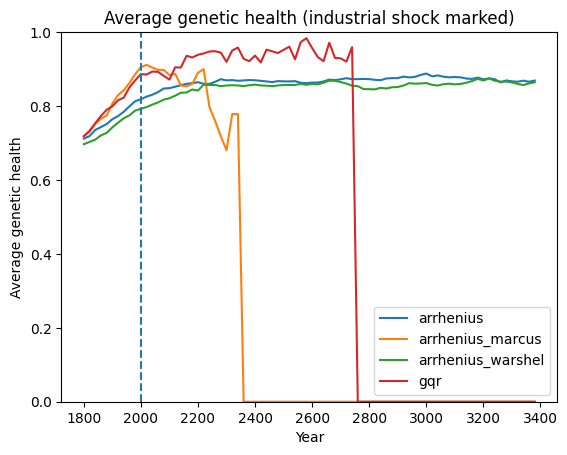

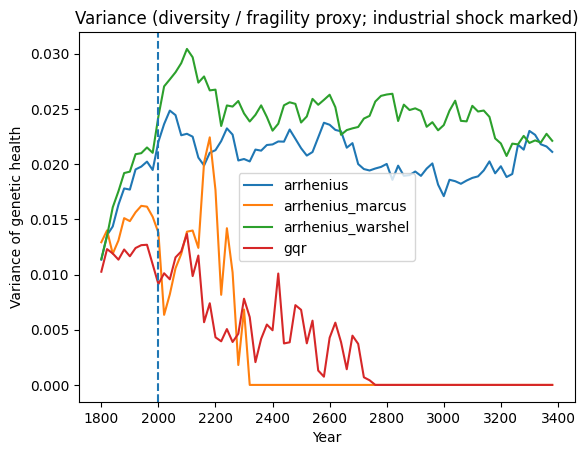

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# =============================
# Settings (time mapping)
# =============================
YEARS_PER_GEN = 20
YEAR0 = 1800

GENERATIONS = 80              # 80 gens = 1600 years (tune to 20-60 for "industrial era")
PRINT_EVERY = 1               # 1 = every generation (your request); set to 2/5/10 if you want less spam
AUTOSAVE_EVERY = 5            # autosave every N generations to /content
OUTFILE = "/content/gqr_4masters_competition_autosave.npz"

# Industrial shock timing (e.g., gen 10 ~ year 2000 if YEAR0=1800)
INDUSTRIAL_SHOCK_GEN = 10

# Shared carrying capacity (competition happens via total population)
K_TOTAL = 8000

# Initial population per regime
N0 = 400

# Mutation model: base + (buffering * extra) + (industrial exposure extra after shock)
BASE_MUT_SIGMA = 0.02
BUFFER_MUT_EXTRA = 0.06
INDUSTRIAL_MUT_EXTRA = 0.06   # added after shock (can tune)

# Effort model
EFFORT_BENEFIT = 0.20
EFFORT_COST = 0.10

SEED = 123
rng = np.random.default_rng(SEED)

# =============================
# Regimes ("four masters")
# =============================
REGIMES = {
    "arrhenius":         {"selection_strength": 0.20, "buffering": 0.80},
    "arrhenius_marcus":  {"selection_strength": 0.50, "buffering": 0.30},
    "arrhenius_warshel": {"selection_strength": 0.10, "buffering": 0.90},
    "gqr":               {"selection_strength": 0.80, "buffering": 0.10},
}

# Standard distinct colours
COLORS = {
    "arrhenius": "#1f77b4",          # blue
    "arrhenius_marcus": "#ff7f0e",   # orange
    "arrhenius_warshel": "#2ca02c",  # green
    "gqr": "#d62728",                # red
}

ORDER = list(REGIMES.keys())

# =============================
# Population representation (arrays per regime)
# Each regime holds: genetic_health, epigenetic_bias, effort
# =============================
def init_pop(n):
    gh = np.clip(rng.normal(0.70, 0.10, size=n), 0, 1)
    eb = rng.uniform(-0.05, 0.05, size=n)
    ef = rng.uniform(0, 1, size=n)
    return gh, eb, ef

pops = {name: init_pop(N0) for name in ORDER}

# =============================
# One generation step for one regime, but with COMPETITION
# competition is applied via total density (total_pop / K_TOTAL)
# =============================
def step_regime(gh, eb, ef, regime_name, total_density, industrial_on):
    sel = REGIMES[regime_name]["selection_strength"]
    buf = REGIMES[regime_name]["buffering"]

    # Fitness proxy
    fitness = np.clip(gh + eb + EFFORT_BENEFIT * ef - EFFORT_COST * ef, 0, 1)

    # Survival governance
    survival_prob = np.clip(buf + sel * fitness, 0, 1)

    # Competition / shared ecology: everyone pays as total density rises
    survival_prob *= max(0.0, 1.0 - total_density)
    survival_prob = np.clip(survival_prob, 0, 1)

    survivors = rng.random(size=gh.size) < survival_prob
    gh_s = gh[survivors]
    eb_s = eb[survivors]
    ef_s = ef[survivors]
    fit_s = fitness[survivors]

    if gh_s.size == 0:
        return gh_s, eb_s, ef_s

    # Reproduction probability (fitness-tied)
    repro = rng.random(size=gh_s.size) < fit_s
    gh_p = gh_s[repro]
    eb_p = eb_s[repro]
    n_children = gh_p.size

    if n_children > 0:
        mut_sigma = BASE_MUT_SIGMA + BUFFER_MUT_EXTRA * buf + (INDUSTRIAL_MUT_EXTRA if industrial_on else 0.0)
        mutation = rng.normal(0.0, mut_sigma, size=n_children)

        child_gh = np.clip(gh_p + mutation, 0, 1)
        child_eb = 0.5 * eb_p
        child_ef = rng.uniform(0, 1, size=n_children)

        gh_next = np.concatenate([gh_s, child_gh])
        eb_next = np.concatenate([eb_s, child_eb])
        ef_next = np.concatenate([ef_s, child_ef])
    else:
        gh_next, eb_next, ef_next = gh_s, eb_s, ef_s

    return gh_next, eb_next, ef_next

# =============================
# History (NOT big): store every generation (80 gens is tiny)
# =============================
hist_year = []
hist_pop = {name: [] for name in ORDER}
hist_health = {name: [] for name in ORDER}
hist_var = {name: [] for name in ORDER}

def autosave(gen):
    save = {
        "year": np.array(hist_year, dtype=int),
        "order": np.array(ORDER),
        "generations_ran": gen,
        "years_per_gen": YEARS_PER_GEN,
        "year0": YEAR0,
        "industrial_shock_gen": INDUSTRIAL_SHOCK_GEN,
        "k_total": K_TOTAL,
    }
    for name in ORDER:
        save[f"{name}_pop"] = np.array(hist_pop[name], dtype=int)
        save[f"{name}_avg_health"] = np.array(hist_health[name], dtype=float)
        save[f"{name}_var_health"] = np.array(hist_var[name], dtype=float)
    np.savez(OUTFILE, **save)

# =============================
# Run
# =============================
t0 = time.time()
print("gen  year  " + "  ".join([f"{n:>16s}" for n in ORDER]) + "   | " + "  ".join([f"{n:>16s}" for n in ORDER]))

for gen in range(GENERATIONS):
    year = YEAR0 + gen * YEARS_PER_GEN
    industrial_on = gen >= INDUSTRIAL_SHOCK_GEN

    # total density = total_pop / K_TOTAL
    total_pop = sum(pops[name][0].size for name in ORDER)
    total_density = total_pop / K_TOTAL

    # step each regime under the same total density (competition)
    new_pops = {}
    for name in ORDER:
        gh, eb, ef = pops[name]
        new_pops[name] = step_regime(gh, eb, ef, name, total_density, industrial_on)
    pops = new_pops

    # record
    hist_year.append(year)
    for name in ORDER:
        gh, eb, ef = pops[name]
        n = gh.size
        hist_pop[name].append(n)
        hist_health[name].append(float(gh.mean()) if n > 0 else 0.0)
        hist_var[name].append(float(gh.var()) if n > 1 else 0.0)

    # one-line progress
    if (gen % PRINT_EVERY) == 0:
        pop_str = "  ".join([f"{hist_pop[n][-1]:16d}" for n in ORDER])
        health_str = "  ".join([f"{hist_health[n][-1]:16.3f}" for n in ORDER])
        print(f"{gen:3d}  {year:4d}  {pop_str}   | {health_str}")

    # autosave
    if (gen % AUTOSAVE_EVERY) == 0 or gen == GENERATIONS - 1:
        autosave(gen)

dt = time.time() - t0
print(f"\nDone in {dt:.2f}s. Autosaved to: {OUTFILE}")

# =============================
# Charts
# =============================
x = np.array(hist_year)

plt.figure()
for name in ORDER:
    plt.plot(x, hist_pop[name], label=name, color=COLORS[name])
plt.axvline(YEAR0 + INDUSTRIAL_SHOCK_GEN * YEARS_PER_GEN, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Population size")
plt.title("Population (competing regimes; shared carrying capacity)")
plt.legend()
plt.show()

plt.figure()
for name in ORDER:
    plt.plot(x, hist_health[name], label=name, color=COLORS[name])
plt.axvline(YEAR0 + INDUSTRIAL_SHOCK_GEN * YEARS_PER_GEN, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Average genetic health")
plt.ylim(0, 1)
plt.title("Average genetic health (industrial shock marked)")
plt.legend()
plt.show()

plt.figure()
for name in ORDER:
    plt.plot(x, hist_var[name], label=name, color=COLORS[name])
plt.axvline(YEAR0 + INDUSTRIAL_SHOCK_GEN * YEARS_PER_GEN, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Variance of genetic health")
plt.title("Variance (diversity / fragility proxy; industrial shock marked)")
plt.legend()
plt.show()

In [ ]:
# --- GQR adaptive variance knobs ---
GQR_VAR_FLOOR = 0.004          # if GQR var drops below this, enable plasticity
GQR_EXPLORATION_BOOST = 0.06   # adds to mutation sigma when plasticity on
GQR_BUFFER_BOOST = 0.15        # temporary extra buffering (survival baseline) when plasticity on

def step_regime(gh, eb, ef, regime_name, total_density, industrial_on):
    sel = REGIMES[regime_name]["selection_strength"]
    buf = REGIMES[regime_name]["buffering"]

    # Fitness proxy
    fitness = np.clip(gh + eb + EFFORT_BENEFIT * ef - EFFORT_COST * ef, 0, 1)

    # ---- Adaptive variance mode (GQR only) ----
    plasticity_on = False
    if regime_name == "gqr" and gh.size > 10:
        current_var = float(gh.var())
        # Turn on plasticity if variance is too low AND we're in a stressful epoch
        if current_var < GQR_VAR_FLOOR and (industrial_on or total_density > 0.6):
            plasticity_on = True

    # Option A: temporary buffering boost (prevents extinction under shock)
    if plasticity_on:
        buf_eff = min(1.0, buf + GQR_BUFFER_BOOST)
        sel_eff = sel  # keep selection strength, or reduce slightly if you want
    else:
        buf_eff = buf
        sel_eff = sel

    # Survival governance
    survival_prob = np.clip(buf_eff + sel_eff * fitness, 0, 1)

    # Competition / shared ecology: everyone pays as total density rises
    survival_prob *= max(0.0, 1.0 - total_density)
    survival_prob = np.clip(survival_prob, 0, 1)

    survivors = rng.random(size=gh.size) < survival_prob
    gh_s = gh[survivors]
    eb_s = eb[survivors]
    ef_s = ef[survivors]
    fit_s = fitness[survivors]

    if gh_s.size == 0:
        return gh_s, eb_s, ef_s

    # Reproduction probability (fitness-tied)
    repro = rng.random(size=gh_s.size) < fit_s
    gh_p = gh_s[repro]
    eb_p = eb_s[repro]
    n_children = gh_p.size

    if n_children > 0:
        # Baseline mutation load: base + buffering channel + industrial channel
        mut_sigma = BASE_MUT_SIGMA + BUFFER_MUT_EXTRA * buf_eff + (INDUSTRIAL_MUT_EXTRA if industrial_on else 0.0)

        # Option B: controlled exploration boost (inject variance, children-only)
        if plasticity_on:
            mut_sigma += GQR_EXPLORATION_BOOST

        mutation = rng.normal(0.0, mut_sigma, size=n_children)

        child_gh = np.clip(gh_p + mutation, 0, 1)
        child_eb = 0.5 * eb_p
        child_ef = rng.uniform(0, 1, size=n_children)

        gh_next = np.concatenate([gh_s, child_gh])
        eb_next = np.concatenate([eb_s, child_eb])
        ef_next = np.concatenate([ef_s, child_ef])
    else:
        gh_next, eb_next, ef_next = gh_s, eb_s, ef_s

    return gh_next, eb_next, ef_next

gen  year         arrhenius  arrhenius_marcus  arrhenius_warshel               gqr   |        arrhenius  arrhenius_marcus  arrhenius_warshel               gqr   | gqr_plastic
  0  1800               542               388               540               409   |            0.712             0.718             0.697             0.718   | -
  1  1820               701               336               693               422   |            0.719             0.730             0.703             0.733   | -
  2  1840               913               305               889               414   |            0.735             0.751             0.709             0.754   | -
  3  1860              1092               290              1023               398   |            0.743             0.766             0.721             0.773   | -
  4  1880              1246               262              1095               375   |            0.751             0.774             0.727             0.790   | -
  5  1900 

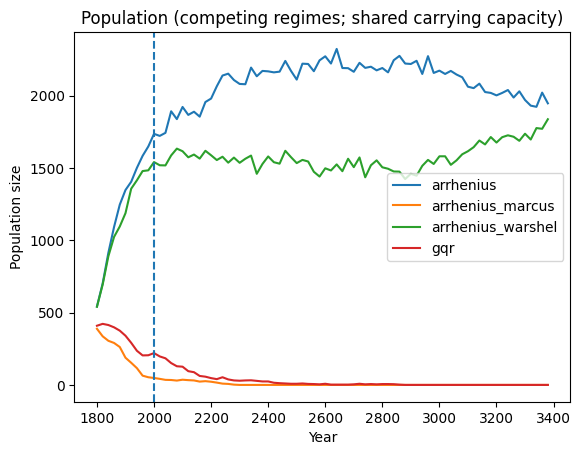

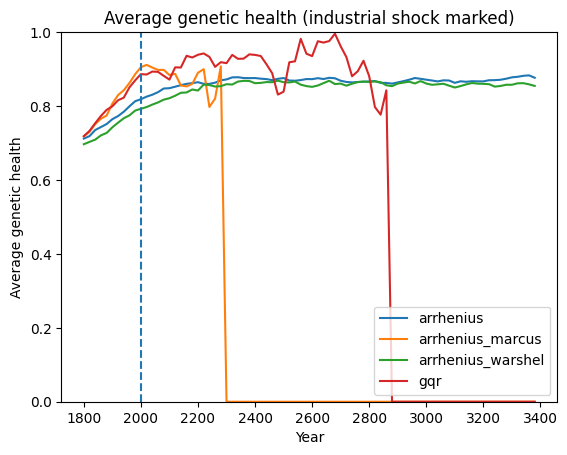

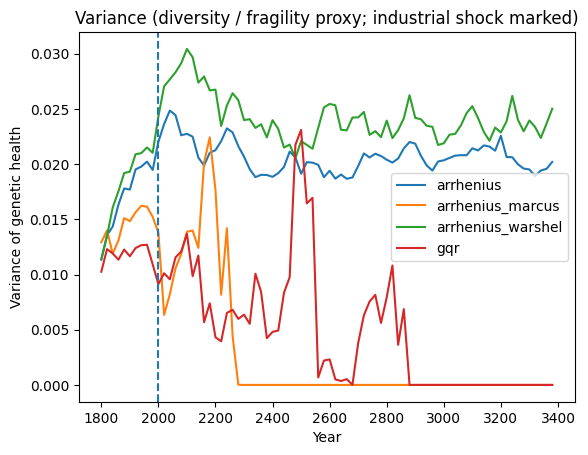

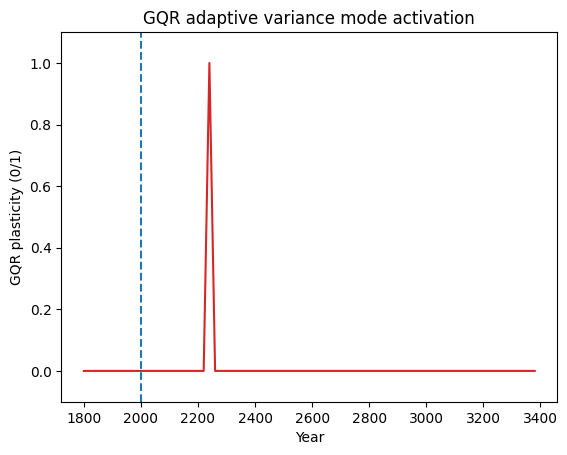

In [ ]:
# =============================
# ONE-CELL PATCH: 4 masters compete + industrial shock + autosave + charts
# with GQR adaptive variance ("plasticity mode")
# Paste this into ONE Colab cell and run.
# It saves: /content/gqr_4masters_competition_autosave.npz
# =============================

import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# Settings (time mapping)
# =============================
YEARS_PER_GEN = 20
YEAR0 = 1800

GENERATIONS = 80               # 80 gens = 1600 years (tune to 20–120)
PRINT_EVERY = 1                # one-line update every generation (set higher to reduce output)
AUTOSAVE_EVERY = 5             # autosave every N generations to /content
OUTFILE = "/content/gqr_4masters_competition_autosave.npz"

# Industrial shock timing (gen 10 ~ year 2000 if YEAR0=1800)
INDUSTRIAL_SHOCK_GEN = 10

# Shared carrying capacity (competition happens via total density)
K_TOTAL = 8000

# Initial population per regime
N0 = 400

# Mutation model: base + (buffering * extra) + (industrial exposure extra after shock)
BASE_MUT_SIGMA = 0.02
BUFFER_MUT_EXTRA = 0.06
INDUSTRIAL_MUT_EXTRA = 0.06    # added after shock (tune)

# Effort model
EFFORT_BENEFIT = 0.20
EFFORT_COST = 0.10

SEED = 123
rng = np.random.default_rng(SEED)

# =============================
# Regimes ("four masters")
# =============================
REGIMES = {
    "arrhenius":         {"selection_strength": 0.20, "buffering": 0.80},
    "arrhenius_marcus":  {"selection_strength": 0.50, "buffering": 0.30},
    "arrhenius_warshel": {"selection_strength": 0.10, "buffering": 0.90},
    "gqr":               {"selection_strength": 0.80, "buffering": 0.10},
}

# Standard distinct colours
COLORS = {
    "arrhenius": "#1f77b4",          # blue
    "arrhenius_marcus": "#ff7f0e",   # orange
    "arrhenius_warshel": "#2ca02c",  # green
    "gqr": "#d62728",                # red
}

ORDER = list(REGIMES.keys())

# =============================
# GQR adaptive variance knobs
# =============================
GQR_VAR_FLOOR = 0.004           # if GQR var drops below this, enable plasticity
GQR_EXPLORATION_BOOST = 0.06    # adds to mutation sigma when plasticity on (children only)
GQR_BUFFER_BOOST = 0.15         # temporary extra buffering when plasticity on

# =============================
# Population initialisation
# =============================
def init_pop(n):
    gh = np.clip(rng.normal(0.70, 0.10, size=n), 0, 1)
    eb = rng.uniform(-0.05, 0.05, size=n)
    ef = rng.uniform(0, 1, size=n)
    return gh, eb, ef

pops = {name: init_pop(N0) for name in ORDER}

# =============================
# One generation step for one regime under COMPETITION + SHOCK
# (includes GQR plasticity mode)
# =============================
def step_regime(gh, eb, ef, regime_name, total_density, industrial_on):
    sel = REGIMES[regime_name]["selection_strength"]
    buf = REGIMES[regime_name]["buffering"]

    # Fitness proxy
    fitness = np.clip(gh + eb + EFFORT_BENEFIT * ef - EFFORT_COST * ef, 0, 1)

    # ---- GQR adaptive variance mode ("plasticity") ----
    plasticity_on = False
    if regime_name == "gqr" and gh.size > 10:
        current_var = float(gh.var())
        if current_var < GQR_VAR_FLOOR and (industrial_on or total_density > 0.6):
            plasticity_on = True

    # Temporary buffering boost to prevent brittle extinction under stress
    if plasticity_on:
        buf_eff = min(1.0, buf + GQR_BUFFER_BOOST)
        sel_eff = sel
    else:
        buf_eff = buf
        sel_eff = sel

    # Survival governance
    survival_prob = np.clip(buf_eff + sel_eff * fitness, 0, 1)

    # Competition / shared ecology: everyone pays as total density rises
    survival_prob *= max(0.0, 1.0 - total_density)
    survival_prob = np.clip(survival_prob, 0, 1)

    survivors = rng.random(size=gh.size) < survival_prob
    gh_s = gh[survivors]
    eb_s = eb[survivors]
    ef_s = ef[survivors]
    fit_s = fitness[survivors]

    if gh_s.size == 0:
        return gh_s, eb_s, ef_s, plasticity_on

    # Reproduction probability (fitness-tied)
    repro = rng.random(size=gh_s.size) < fit_s
    gh_p = gh_s[repro]
    eb_p = eb_s[repro]
    n_children = gh_p.size

    if n_children > 0:
        # Baseline mutation load: base + buffering channel + industrial channel
        mut_sigma = BASE_MUT_SIGMA + BUFFER_MUT_EXTRA * buf_eff + (INDUSTRIAL_MUT_EXTRA if industrial_on else 0.0)

        # Controlled exploration boost (inject variance, children-only)
        if plasticity_on:
            mut_sigma += GQR_EXPLORATION_BOOST

        mutation = rng.normal(0.0, mut_sigma, size=n_children)

        child_gh = np.clip(gh_p + mutation, 0, 1)
        child_eb = 0.5 * eb_p
        child_ef = rng.uniform(0, 1, size=n_children)

        gh_next = np.concatenate([gh_s, child_gh])
        eb_next = np.concatenate([eb_s, child_eb])
        ef_next = np.concatenate([ef_s, child_ef])
    else:
        gh_next, eb_next, ef_next = gh_s, eb_s, ef_s

    return gh_next, eb_next, ef_next, plasticity_on

# =============================
# History (small)
# =============================
hist_year = []
hist_pop = {name: [] for name in ORDER}
hist_health = {name: [] for name in ORDER}
hist_var = {name: [] for name in ORDER}
hist_gqr_plastic = []  # 1 if plasticity on that gen, else 0

def autosave(gen):
    save = {
        "year": np.array(hist_year, dtype=int),
        "order": np.array(ORDER),
        "generations_ran": int(gen),
        "years_per_gen": int(YEARS_PER_GEN),
        "year0": int(YEAR0),
        "industrial_shock_gen": int(INDUSTRIAL_SHOCK_GEN),
        "k_total": int(K_TOTAL),
        "gqr_plasticity": np.array(hist_gqr_plastic, dtype=int),
        "seed": int(SEED),
        "gqr_var_floor": float(GQR_VAR_FLOOR),
        "gqr_exploration_boost": float(GQR_EXPLORATION_BOOST),
        "gqr_buffer_boost": float(GQR_BUFFER_BOOST),
    }
    for name in ORDER:
        save[f"{name}_pop"] = np.array(hist_pop[name], dtype=int)
        save[f"{name}_avg_health"] = np.array(hist_health[name], dtype=float)
        save[f"{name}_var_health"] = np.array(hist_var[name], dtype=float)
    np.savez(OUTFILE, **save)

# =============================
# Run
# =============================
t0 = time.time()

print("gen  year  " + "  ".join([f"{n:>16s}" for n in ORDER]) + "   | " + "  ".join([f"{n:>16s}" for n in ORDER]) + "   | gqr_plastic")

shock_year = YEAR0 + INDUSTRIAL_SHOCK_GEN * YEARS_PER_GEN

for gen in range(GENERATIONS):
    year = YEAR0 + gen * YEARS_PER_GEN
    industrial_on = gen >= INDUSTRIAL_SHOCK_GEN

    total_pop = sum(pops[name][0].size for name in ORDER)
    total_density = total_pop / K_TOTAL

    new_pops = {}
    gqr_plastic_now = 0

    for name in ORDER:
        gh, eb, ef = pops[name]
        gh2, eb2, ef2, plast = step_regime(gh, eb, ef, name, total_density, industrial_on)
        new_pops[name] = (gh2, eb2, ef2)
        if name == "gqr":
            gqr_plastic_now = 1 if plast else 0

    pops = new_pops

    # record
    hist_year.append(year)
    hist_gqr_plastic.append(gqr_plastic_now)

    for name in ORDER:
        gh, eb, ef = pops[name]
        n = gh.size
        hist_pop[name].append(n)
        hist_health[name].append(float(gh.mean()) if n > 0 else 0.0)
        hist_var[name].append(float(gh.var()) if n > 1 else 0.0)

    # one-line progress
    if (gen % PRINT_EVERY) == 0:
        pop_str = "  ".join([f"{hist_pop[n][-1]:16d}" for n in ORDER])
        health_str = "  ".join([f"{hist_health[n][-1]:16.3f}" for n in ORDER])
        marker = "P" if gqr_plastic_now else "-"
        print(f"{gen:3d}  {year:4d}  {pop_str}   | {health_str}   | {marker}")

    # autosave
    if (gen % AUTOSAVE_EVERY) == 0 or gen == GENERATIONS - 1:
        autosave(gen)

dt = time.time() - t0
print(f"\nDone in {dt:.2f}s. Autosaved to: {OUTFILE}")

# =============================
# Charts
# =============================
x = np.array(hist_year)

plt.figure()
for name in ORDER:
    plt.plot(x, hist_pop[name], label=name, color=COLORS[name])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Population size")
plt.title("Population (competing regimes; shared carrying capacity)")
plt.legend()
plt.show()

plt.figure()
for name in ORDER:
    plt.plot(x, hist_health[name], label=name, color=COLORS[name])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Average genetic health")
plt.ylim(0, 1)
plt.title("Average genetic health (industrial shock marked)")
plt.legend()
plt.show()

plt.figure()
for name in ORDER:
    plt.plot(x, hist_var[name], label=name, color=COLORS[name])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Variance of genetic health")
plt.title("Variance (diversity / fragility proxy; industrial shock marked)")
plt.legend()
plt.show()

plt.figure()
plt.plot(x, hist_gqr_plastic, color=COLORS["gqr"])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("GQR plasticity (0/1)")
plt.title("GQR adaptive variance mode activation")
plt.ylim(-0.1, 1.1)
plt.show()

gen year | arrhenius arrhenius_marcus arrhenius_warshel       gqr | arrhenius arrhenius_marcus arrhenius_warshel       gqr | arrhenius arrhenius_marcus arrhenius_warshel    gqr | gqr
  0 1800 |       511       398       565       472 |     0.709     0.717     0.709     0.725 |   0.98   1.02   0.95   1.04 | -
  1 1820 |       510       318       683       439 |     0.721     0.728     0.720     0.738 |   0.96   1.03   0.89   1.08 | -
  2 1840 |       524       313       823       423 |     0.735     0.739     0.729     0.748 |   0.94   1.05   0.83   1.12 | -
  3 1860 |       540       298       977       390 |     0.747     0.759     0.736     0.768 |   0.92   1.06   0.75   1.16 | -
  4 1880 |       557       278      1092       356 |     0.760     0.775     0.745     0.787 |   0.90   1.07   0.68   1.20 | -
  5 1900 |       585       271      1225       396 |     0.776     0.792     0.758     0.799 |   0.89   1.08   0.59   1.23 | -
  6 1920 |       606       212      1319       379 |   

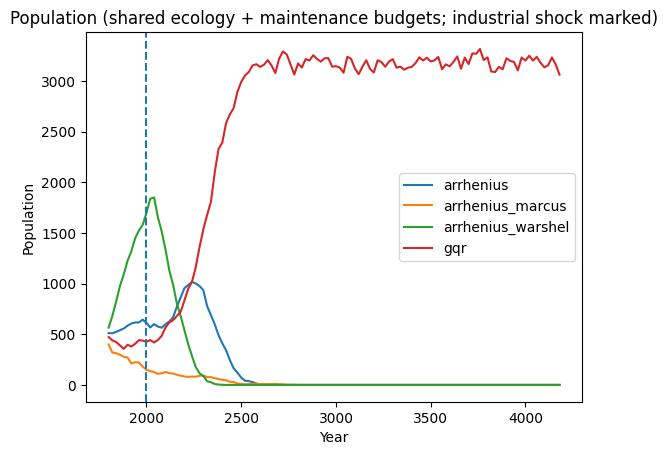

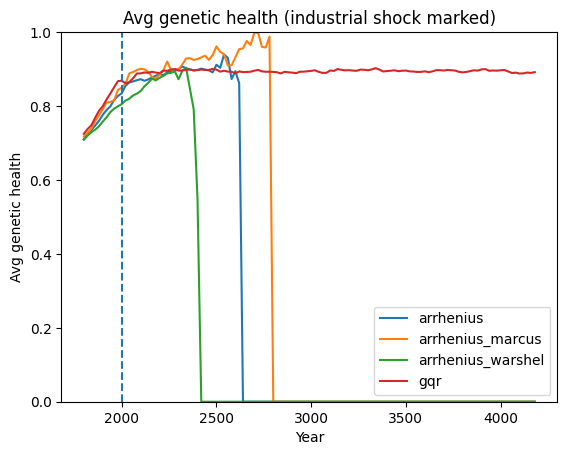

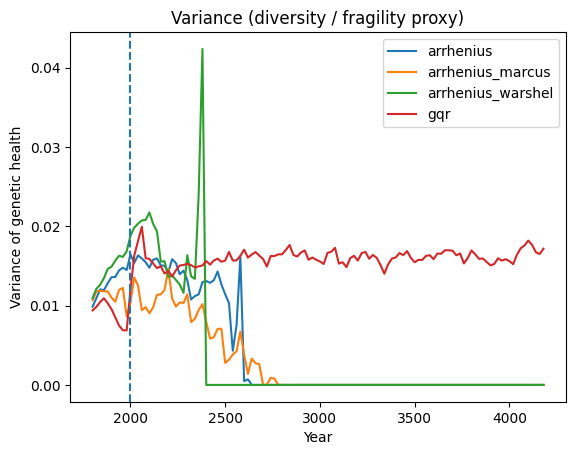

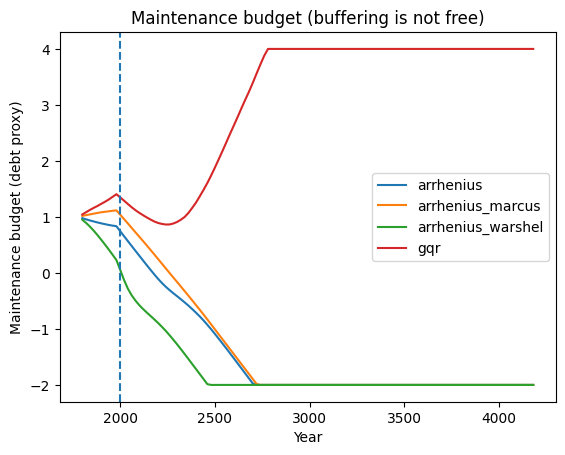

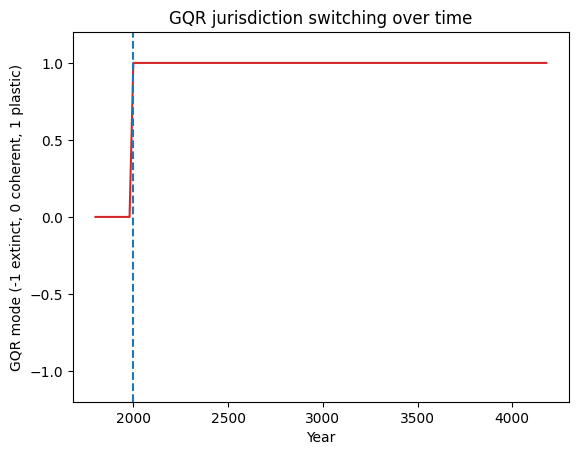

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# Time mapping / run controls
# =============================
YEARS_PER_GEN = 20
YEAR0 = 1800
GENERATIONS = 120          # 120 gens = 2400 years; set 30–80 for industrial-era focus
PRINT_EVERY = 1            # one-line update each gen (set to 2/5/10 to reduce output)
AUTOSAVE_EVERY = 5
OUTFILE = "/content/rights_game_4masters_autosave.npz"
SEED = 123
rng = np.random.default_rng(SEED)

# Industrial shock
INDUSTRIAL_SHOCK_GEN = 10  # gen 10 ~ year 2000 if YEAR0=1800
INDUSTRIAL_MUT_EXTRA = 0.05
INDUSTRIAL_BUDGET_DRAIN_EXTRA = 0.08   # extra maintenance burden after industrialisation
SHOCK_STRESS_LEVEL = 0.35              # used by GQR jurisdiction switching

# Shared ecology (competition)
K_TOTAL = 9000  # shared carrying capacity scale

# Initial population per regime
N0 = 500

# Fitness model
EFFORT_BENEFIT = 0.20
EFFORT_COST = 0.12  # makes training non-free

# Mutation model
BASE_MUT_SIGMA = 0.02
BUFFER_MUT_EXTRA = 0.05  # "gene mangling" channel: buffering increases mutation load

# Budget / maintenance model
# Budget is a proxy for energy/infrastructure/complexity that keeps buffering running.
BUDGET0 = 1.0
BUDGET_MIN = -2.0
BUDGET_MAX = 4.0

# How budgets change each gen:
# - Earned by productive competence (fitness * population)
# - Spent by buffering (buffering_eff * population), plus baseline overhead
BUDGET_EARN_SCALE = 0.00035
BUDGET_SPEND_SCALE = 0.00055
BUDGET_BASE_OVERHEAD = 0.010

# When budget is low, buffering effectiveness collapses (debt comes due)
def buffering_effect_from_budget(buffering, budget):
    # Smooth clamp: if budget below 0, effective buffering drops
    if budget >= 0:
        return buffering
    # linear drop to zero by BUDGET_MIN
    frac = max(0.0, (budget - BUDGET_MIN) / (0.0 - BUDGET_MIN))
    return buffering * frac

# =============================
# Regimes: constitutional parameters
# =============================
# selection_strength = coupling between competence and survival
# buffering = baseline survival decoupled from competence
REGIMES = {
    "arrhenius": {
        "selection_strength": 0.25,
        "buffering": 0.55,
        "coherence": 0.10,  # mostly irrelevant here (used for symmetry / plotting)
    },
    "arrhenius_marcus": {
        "selection_strength": 0.50,
        "buffering": 0.25,
        "coherence": 0.15,
    },
    "arrhenius_warshel": {
        "selection_strength": 0.18,
        "buffering": 0.70,
        "coherence": 0.20,
    },
    "gqr": {
        "selection_strength": 0.75,
        "buffering": 0.12,
        "coherence": 0.70,  # interpreted as capability for structured option management
    },
}

COLORS = {
    "arrhenius": "#1f77b4",
    "arrhenius_marcus": "#ff7f0e",
    "arrhenius_warshel": "#2ca02c",
    "gqr": "#d62728",
}

ORDER = list(REGIMES.keys())

# =============================
# Population representation: arrays per regime
# gh = genetic health in [0,1]
# eb = epigenetic bias (small +/-)
# ef = effort in [0,1]
# =============================
def init_pop(n):
    gh = np.clip(rng.normal(0.70, 0.10, size=n), 0, 1)
    eb = rng.uniform(-0.05, 0.05, size=n)
    ef = rng.uniform(0, 1, size=n)
    return gh, eb, ef

pops = {name: init_pop(N0) for name in ORDER}
budgets = {name: float(BUDGET0) for name in ORDER}

# =============================
# GQR jurisdiction switching ("phase-dependent governance")
# =============================
# GQR has two modes:
# - "coherent" mode: high selection, low buffering, low exploration (tight)
# - "plastic" mode: relax selection a bit, increase buffering a bit, increase exploration (variance-preserving)
GQR_VAR_FLOOR = 0.004
GQR_PLASTIC_BUFFER_BOOST = 0.20
GQR_PLASTIC_SELECTION_MULT = 0.70
GQR_PLASTIC_MUT_BOOST = 0.05

def gqr_mode(gh, total_density, shock_level, budget):
    # Turn plastic if variance too low under stress, OR budget is stressed, OR shock high
    var = float(gh.var()) if gh.size > 20 else 0.0
    if shock_level > SHOCK_STRESS_LEVEL:
        return "plastic"
    if var < GQR_VAR_FLOOR and total_density > 0.55:
        return "plastic"
    if budget < 0.0:
        return "plastic"
    return "coherent"

# =============================
# One-generation step for one regime
# =============================
def step_regime(name, gh, eb, ef, budget, total_density, industrial_on, shock_level):
    params = REGIMES[name]
    sel = params["selection_strength"]
    buf = params["buffering"]

    # GQR: phase-dependent governance
    mode = "-"
    if name == "gqr":
        mode = gqr_mode(gh, total_density, shock_level, budget)
        if mode == "plastic":
            sel = sel * GQR_PLASTIC_SELECTION_MULT
            buf = min(1.0, buf + GQR_PLASTIC_BUFFER_BOOST)

    # Budget affects buffering effectiveness (debt clause)
    buf_eff = buffering_effect_from_budget(buf, budget)

    # Fitness proxy
    fitness = np.clip(gh + eb + EFFORT_BENEFIT * ef - EFFORT_COST * ef, 0, 1)

    # Survival probability: selection + buffering
    survival_prob = np.clip(buf_eff + sel * fitness, 0, 1)

    # Shared ecological competition: survival penalised by total density
    survival_prob *= max(0.0, 1.0 - total_density)
    survival_prob = np.clip(survival_prob, 0, 1)

    survivors = rng.random(size=gh.size) < survival_prob
    gh_s = gh[survivors]
    eb_s = eb[survivors]
    ef_s = ef[survivors]
    fit_s = fitness[survivors]

    if gh_s.size == 0:
        # still update budget (it will decay)
        earned = 0.0
        spent = BUDGET_BASE_OVERHEAD
        if industrial_on:
            spent += INDUSTRIAL_BUDGET_DRAIN_EXTRA
        budget_next = float(np.clip(budget + earned - spent, BUDGET_MIN, BUDGET_MAX))
        return gh_s, eb_s, ef_s, budget_next, mode, buf_eff

    # Reproduction probability tied to fitness
    repro = rng.random(size=gh_s.size) < fit_s
    gh_p = gh_s[repro]
    eb_p = eb_s[repro]
    n_children = gh_p.size

    # Mutation sigma: base + buffering channel + industrial exposure channel (+ GQR plastic exploration)
    mut_sigma = BASE_MUT_SIGMA + BUFFER_MUT_EXTRA * buf_eff + (INDUSTRIAL_MUT_EXTRA if industrial_on else 0.0)
    if name == "gqr" and mode == "plastic":
        mut_sigma += GQR_PLASTIC_MUT_BOOST

    if n_children > 0:
        mutation = rng.normal(0.0, mut_sigma, size=n_children)
        child_gh = np.clip(gh_p + mutation, 0, 1)
        child_eb = 0.5 * eb_p
        child_ef = rng.uniform(0, 1, size=n_children)

        gh_next = np.concatenate([gh_s, child_gh])
        eb_next = np.concatenate([eb_s, child_eb])
        ef_next = np.concatenate([ef_s, child_ef])
    else:
        gh_next, eb_next, ef_next = gh_s, eb_s, ef_s

    # Budget update: earn from productive competence, spend for buffering + overhead (+ industrial burden)
    avg_fit = float(fit_s.mean()) if fit_s.size > 0 else 0.0
    earned = BUDGET_EARN_SCALE * avg_fit * gh_s.size
    spent = BUDGET_BASE_OVERHEAD + BUDGET_SPEND_SCALE * buf_eff * gh_s.size
    if industrial_on:
        spent += INDUSTRIAL_BUDGET_DRAIN_EXTRA

    budget_next = float(np.clip(budget + earned - spent, BUDGET_MIN, BUDGET_MAX))
    return gh_next, eb_next, ef_next, budget_next, mode, buf_eff

# =============================
# Histories (small; autosaved)
# =============================
hist_year = []
hist_total_pop = []
hist_shock = []

hist_pop = {n: [] for n in ORDER}
hist_avg = {n: [] for n in ORDER}
hist_var = {n: [] for n in ORDER}
hist_budget = {n: [] for n in ORDER}
hist_bufeff = {n: [] for n in ORDER}
hist_gqr_mode = []  # 0 coherent, 1 plastic, -1 extinct

def autosave(gen):
    save = {
        "year": np.array(hist_year, dtype=int),
        "total_pop": np.array(hist_total_pop, dtype=int),
        "shock_level": np.array(hist_shock, dtype=float),
        "order": np.array(ORDER),
        "generations_ran": int(gen),
        "years_per_gen": int(YEARS_PER_GEN),
        "year0": int(YEAR0),
        "industrial_shock_gen": int(INDUSTRIAL_SHOCK_GEN),
        "k_total": int(K_TOTAL),
        "seed": int(SEED),
        "params": np.array([0]),  # placeholder for easy loading
        "gqr_mode": np.array(hist_gqr_mode, dtype=int),
    }
    for n in ORDER:
        save[f"{n}_pop"] = np.array(hist_pop[n], dtype=int)
        save[f"{n}_avg_health"] = np.array(hist_avg[n], dtype=float)
        save[f"{n}_var_health"] = np.array(hist_var[n], dtype=float)
        save[f"{n}_budget"] = np.array(hist_budget[n], dtype=float)
        save[f"{n}_buffering_eff"] = np.array(hist_bufeff[n], dtype=float)
    np.savez(OUTFILE, **save)

# =============================
# Run
# =============================
t0 = time.time()
shock_year = YEAR0 + INDUSTRIAL_SHOCK_GEN * YEARS_PER_GEN

print("gen year | " + " ".join([f"{n:>9s}" for n in ORDER]) +
      " | " + " ".join([f"{n:>9s}" for n in ORDER]) +
      " | " + " ".join([f"{n:>6s}" for n in ORDER]) +
      " | gqr")

for gen in range(GENERATIONS):
    year = YEAR0 + gen * YEARS_PER_GEN
    industrial_on = gen >= INDUSTRIAL_SHOCK_GEN

    # Define "shock level" as a simple piecewise: 0 pre-industrial, 1 post-industrial
    # (You can replace this later with a varying signal)
    shock_level = 1.0 if industrial_on else 0.0

    # Competition: total density from current total population
    total_pop = sum(pops[n][0].size for n in ORDER)
    total_density = total_pop / K_TOTAL

    # Step each regime under the same total density and shock level
    new_pops = {}
    new_budgets = {}
    modes = {}
    bufeffs = {}

    for n in ORDER:
        gh, eb, ef = pops[n]
        gh2, eb2, ef2, bud2, mode, buf_eff = step_regime(n, gh, eb, ef, budgets[n], total_density, industrial_on, shock_level)
        new_pops[n] = (gh2, eb2, ef2)
        new_budgets[n] = bud2
        modes[n] = mode
        bufeffs[n] = buf_eff

    pops = new_pops
    budgets = new_budgets

    # Record
    hist_year.append(year)
    hist_total_pop.append(sum(pops[n][0].size for n in ORDER))
    hist_shock.append(shock_level)

    for n in ORDER:
        gh, eb, ef = pops[n]
        nn = gh.size
        hist_pop[n].append(int(nn))
        hist_avg[n].append(float(gh.mean()) if nn > 0 else 0.0)
        hist_var[n].append(float(gh.var()) if nn > 1 else 0.0)
        hist_budget[n].append(float(budgets[n]))
        hist_bufeff[n].append(float(bufeffs[n]))

    # GQR mode series
    if pops["gqr"][0].size == 0:
        hist_gqr_mode.append(-1)
    else:
        hist_gqr_mode.append(1 if modes["gqr"] == "plastic" else 0)

    # One-line progress
    if gen % PRINT_EVERY == 0:
        pop_str = " ".join([f"{hist_pop[n][-1]:9d}" for n in ORDER])
        avg_str = " ".join([f"{hist_avg[n][-1]:9.3f}" for n in ORDER])
        bud_str = " ".join([f"{hist_budget[n][-1]:6.2f}" for n in ORDER])
        gqr_mark = "P" if hist_gqr_mode[-1] == 1 else ("X" if hist_gqr_mode[-1] == -1 else "-")
        print(f"{gen:3d} {year:4d} | {pop_str} | {avg_str} | {bud_str} | {gqr_mark}")

    # Autosave
    if gen % AUTOSAVE_EVERY == 0 or gen == GENERATIONS - 1:
        autosave(gen)

dt = time.time() - t0
print(f"\nDone in {dt:.2f}s. Autosaved to: {OUTFILE}")

# =============================
# Plots
# =============================
x = np.array(hist_year)

plt.figure()
for n in ORDER:
    plt.plot(x, hist_pop[n], label=n, color=COLORS[n])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population (shared ecology + maintenance budgets; industrial shock marked)")
plt.legend()
plt.show()

plt.figure()
for n in ORDER:
    plt.plot(x, hist_avg[n], label=n, color=COLORS[n])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Avg genetic health")
plt.ylim(0, 1)
plt.title("Avg genetic health (industrial shock marked)")
plt.legend()
plt.show()

plt.figure()
for n in ORDER:
    plt.plot(x, hist_var[n], label=n, color=COLORS[n])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Variance of genetic health")
plt.title("Variance (diversity / fragility proxy)")
plt.legend()
plt.show()

plt.figure()
for n in ORDER:
    plt.plot(x, hist_budget[n], label=n, color=COLORS[n])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Maintenance budget (debt proxy)")
plt.title("Maintenance budget (buffering is not free)")
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.array(hist_gqr_mode), color=COLORS["gqr"])
plt.axvline(shock_year, linestyle="--")
plt.xlabel("Year")
plt.ylabel("GQR mode (-1 extinct, 0 coherent, 1 plastic)")
plt.title("GQR jurisdiction switching over time")
plt.ylim(-1.2, 1.2)
plt.show()

Running enzyme rights-game: N_PATHS=50, EVENTS=200000, shocks at 50000 and 120000


=== arrhenius (1/4) ===
[arrhenius       ] event=  10000/200000  yield= 0.032  diss/prod= 32.551  elapsed= 0.5s
[arrhenius       ] event=  20000/200000  yield= 0.030  diss/prod= 34.401  elapsed= 0.9s
[arrhenius       ] event=  30000/200000  yield= 0.031  diss/prod= 33.910  elapsed= 1.4s
[arrhenius       ] event=  40000/200000  yield= 0.032  diss/prod= 33.133  elapsed= 1.8s
[arrhenius       ] event=  50000/200000  yield= 0.032  diss/prod= 33.037  elapsed= 2.3s
[arrhenius       ] event=  60000/200000  yield= 0.031  diss/prod= 33.595  elapsed= 2.6s
[arrhenius       ] event=  70000/200000  yield= 0.031  diss/prod= 33.890  elapsed= 2.8s
[arrhenius       ] event=  80000/200000  yield= 0.031  diss/prod= 33.728  elapsed= 3.1s
[arrhenius       ] event=  90000/200000  yield= 0.031  diss/prod= 33.506  elapsed= 3.3s
[arrhenius       ] event= 100000/200000  yield= 0.032  diss/prod= 33.255  elapsed= 3.5s
[arrhenius  

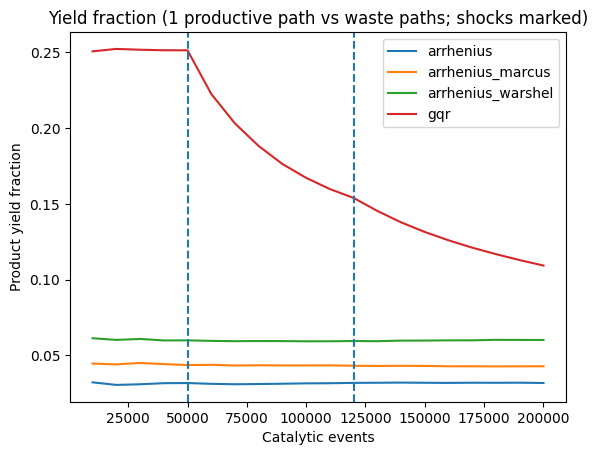

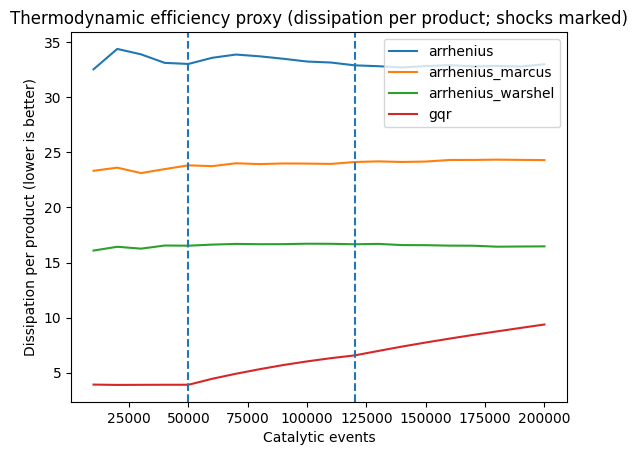

KeyError: 'gqr_budget'

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# Config
# =============================
SEED = 123
rng = np.random.default_rng(SEED)

N_PATHS = 50
PRODUCT_IDX = 0
EVENTS = 200_000

PRINT_EVERY = 10_000            # one-line progress cadence
AUTOSAVE_EVERY = 20_000
OUTFILE = "/content/enz_rights_game_autosave.npz"

# Two disorder shocks (increase "disorder", which harms GQR filtering)
SHOCK1 = int(0.25 * EVENTS)
SHOCK2 = int(0.60 * EVENTS)
SHOCK_DISORDER_JUMP = 0.30

# Thermodynamic scale (dimensionless)
BETA = 2.2  # higher -> more barrier-sensitive (like lower temperature)

# =============================
# Path landscape (shared across regimes)
# =============================
# Barriers: productive path is modestly favourable; wastes distributed a bit worse on average
base_barriers = np.clip(rng.normal(loc=1.2, scale=0.25, size=N_PATHS), 0.3, 2.2)
base_barriers[PRODUCT_IDX] = 0.95

# Reorganisation-like penalties (Marcus): wastes tend to have higher reorg "friction"
reorg = np.clip(rng.normal(loc=0.35, scale=0.10, size=N_PATHS), 0.05, 0.8)
reorg[PRODUCT_IDX] = 0.20

# Dissipation costs (entropy/heat per event) — wastes often more dissipative
dissipation = np.clip(rng.normal(loc=1.0, scale=0.25, size=N_PATHS), 0.2, 2.0)
dissipation[PRODUCT_IDX] = 0.75

# Reward: productive yields 1 product unit, wastes yield 0
reward = np.zeros(N_PATHS, dtype=float)
reward[PRODUCT_IDX] = 1.0

# =============================
# Regimes ("four masters") as control styles
# =============================
REGIMES = ["arrhenius", "arrhenius_marcus", "arrhenius_warshel", "gqr"]
COLORS = {
    "arrhenius": "#1f77b4",
    "arrhenius_marcus": "#ff7f0e",
    "arrhenius_warshel": "#2ca02c",
    "gqr": "#d62728",
}

# Warshel: barrier shaping parameters
WARSHEL_LOWER_PRODUCT = 0.25        # lower productive barrier
WARSHEL_RAISE_WASTE = 0.05          # slight waste penalty (better preorganisation)
WARSHEL_DISSIPATION_REDUCE = 0.05   # slightly less dissipation from better organisation

# GQR: filter + budget model
GQR_FILTER_BASE = 0.90          # 0..1 : higher -> stronger suppression of waste paths
GQR_FILTER_COST = 0.0008        # budget cost per event per unit filter strength
GQR_BUDGET0 = 1.0
GQR_BUDGET_MIN = -2.0
GQR_BUDGET_MAX = 4.0

# GQR earns budget from "useful work": product yield with low dissipation
GQR_EARN_SCALE = 0.050

# When disorder rises, filter effectiveness drops.
# Also, when budget is negative, filter collapses.
def gqr_effective_filter(filter_setting, disorder, budget):
    # disorder reduces filter linearly; budget<0 reduces further
    eff = filter_setting * max(0.0, 1.0 - disorder)
    if budget < 0:
        # linearly reduce to 0 by BUDGET_MIN
        frac = max(0.0, (budget - GQR_BUDGET_MIN) / (0.0 - GQR_BUDGET_MIN))
        eff *= frac
    return float(np.clip(eff, 0.0, 1.0))

# =============================
# Weight functions per regime (path selection)
# =============================
def weights_arrhenius(barriers):
    # thermal choice ~ exp(-beta * barrier)
    w = np.exp(-BETA * barriers)
    return w / w.sum()

def weights_arrhenius_marcus(barriers, reorg):
    # crude Marcus-like: barrier + reorg penalty
    w = np.exp(-BETA * (barriers + reorg))
    return w / w.sum()

def weights_arrhenius_warshel(barriers, dissipation):
    # protein reshapes barriers: lowers productive, slightly raises wastes
    b = barriers.copy()
    b[PRODUCT_IDX] = max(0.0, b[PRODUCT_IDX] - WARSHEL_LOWER_PRODUCT)
    b[1:] = b[1:] + WARSHEL_RAISE_WASTE
    w = np.exp(-BETA * b)
    return w / w.sum()

def weights_gqr(barriers, filter_eff):
    # GQR pre-collapse filtering suppresses waste weights multiplicatively
    w = np.exp(-BETA * barriers)
    # apply suppression: waste weights multiplied by (1 - filter_eff)
    w2 = w.copy()
    w2[1:] *= (1.0 - filter_eff)
    # productive path remains unsuppressed
    s = w2.sum()
    if s <= 0:
        # fallback (shouldn't happen)
        w2 = np.ones_like(w2) / len(w2)
        return w2
    return w2 / s

# =============================
# Simulation loop
# =============================
def run_regime(name):
    disorder = 0.0
    budget = GQR_BUDGET0 if name == "gqr" else 0.0

    cum_product = 0.0
    cum_waste = 0.0
    cum_diss = 0.0

    # time series (downsampled)
    t = []
    yield_frac = []
    throughput = []
    diss_per_prod = []
    gqr_budget = []
    gqr_filter_eff_series = []
    disorder_series = []

    t0 = time.time()

    # precompute static weights for regimes that don't change over time
    if name == "arrhenius":
        base_w = weights_arrhenius(base_barriers)
    elif name == "arrhenius_marcus":
        base_w = weights_arrhenius_marcus(base_barriers, reorg)
    elif name == "arrhenius_warshel":
        base_w = weights_arrhenius_warshel(base_barriers, dissipation)
    else:
        base_w = None  # gqr is dynamic

    for k in range(1, EVENTS + 1):
        # shocks
        if k == SHOCK1 or k == SHOCK2:
            disorder = float(np.clip(disorder + SHOCK_DISORDER_JUMP, 0.0, 0.95))

        # pick a pathway
        if name != "gqr":
            idx = rng.choice(N_PATHS, p=base_w)
        else:
            # GQR jurisdiction switching: if disorder high, relax filtering slightly (plasticity)
            # (this prevents overcommitment when coherence is not maintainable)
            if disorder > 0.45:
                filter_setting = 0.65 * GQR_FILTER_BASE
            else:
                filter_setting = GQR_FILTER_BASE

            filter_eff = gqr_effective_filter(filter_setting, disorder, budget)
            w = weights_gqr(base_barriers, filter_eff)
            idx = rng.choice(N_PATHS, p=w)

        # update tallies
        got_product = reward[idx]
        if got_product > 0:
            cum_product += 1.0
        else:
            cum_waste += 1.0

        # dissipation accounting (Warshel slightly reduces dissipation via preorganisation)
        d = dissipation[idx]
        if name == "arrhenius_warshel":
            d = max(0.0, d - WARSHEL_DISSIPATION_REDUCE)
        cum_diss += d

        # budget dynamics (GQR only): pay filter maintenance, earn on efficient product
        if name == "gqr":
            # spend scales with filter_eff (maintenance) + a tiny baseline overhead
            spend = (GQR_FILTER_COST * filter_eff) + 0.0003
            # earn if product formed efficiently (reward - dissipation penalty)
            earn = GQR_EARN_SCALE * (got_product * max(0.0, 1.2 - d))
            budget = float(np.clip(budget + earn - spend, GQR_BUDGET_MIN, GQR_BUDGET_MAX))

        # record series (downsample at PRINT_EVERY cadence, plus final point)
        if (k % PRINT_EVERY) == 0 or k == EVENTS:
            yfrac = cum_product / max(1.0, (cum_product + cum_waste))
            thr = (cum_product + cum_waste) / k  # should be ~1 always; kept for symmetry
            dpp = cum_diss / max(1.0, cum_product)  # dissipation per product made

            t.append(k)
            yield_frac.append(yfrac)
            throughput.append(thr)
            diss_per_prod.append(dpp)
            disorder_series.append(disorder)

            if name == "gqr":
                gqr_budget.append(budget)
                gqr_filter_eff_series.append(filter_eff)
            else:
                gqr_budget.append(np.nan)
                gqr_filter_eff_series.append(np.nan)

            dt = time.time() - t0
            gqr_tag = ""
            if name == "gqr":
                gqr_tag = f" | bud={budget: .2f} filt={filter_eff: .2f} dis={disorder: .2f}"
            print(f"[{name:16s}] event={k:7d}/{EVENTS}  yield={yfrac: .3f}  diss/prod={dpp: .3f}  elapsed={dt: .1f}s{gqr_tag}")

    return {
        "t": np.array(t, dtype=int),
        "yield_frac": np.array(yield_frac, dtype=float),
        "diss_per_prod": np.array(diss_per_prod, dtype=float),
        "disorder": np.array(disorder_series, dtype=float),
        "gqr_budget": np.array(gqr_budget, dtype=float),
        "gqr_filter_eff": np.array(gqr_filter_eff_series, dtype=float),
        "final_product": float(cum_product),
        "final_waste": float(cum_waste),
        "final_diss": float(cum_diss),
    }

# =============================
# Run all regimes + autosave
# =============================
results = {}
print(f"Running enzyme rights-game: N_PATHS={N_PATHS}, EVENTS={EVENTS}, shocks at {SHOCK1} and {SHOCK2}\n")
for i, name in enumerate(REGIMES, 1):
    print(f"\n=== {name} ({i}/{len(REGIMES)}) ===")
    results[name] = run_regime(name)

# autosave to /content
save = {
    "seed": np.array([SEED]),
    "n_paths": np.array([N_PATHS]),
    "events": np.array([EVENTS]),
    "product_idx": np.array([PRODUCT_IDX]),
    "shock1": np.array([SHOCK1]),
    "shock2": np.array([SHOCK2]),
    "shock_disorder_jump": np.array([SHOCK_DISORDER_JUMP]),
    "beta": np.array([BETA]),
    "base_barriers": base_barriers,
    "reorg": reorg,
    "dissipation": dissipation,
    "regimes": np.array(REGIMES),
}
for name in REGIMES:
    for key, arr in results[name].items():
        save[f"{name}_{key}"] = arr

np.savez(OUTFILE, **save)
print(f"\nSaved autosave file to: {OUTFILE}")

# =============================
# Plots
# =============================
def vline_events(ax):
    ax.axvline(SHOCK1, linestyle="--")
    ax.axvline(SHOCK2, linestyle="--")

plt.figure()
for name in REGIMES:
    plt.plot(results[name]["t"], results[name]["yield_frac"], label=name, color=COLORS[name])
vline_events(plt.gca())
plt.xlabel("Catalytic events")
plt.ylabel("Product yield fraction")
plt.title("Yield fraction (1 productive path vs waste paths; shocks marked)")
plt.legend()
plt.show()

plt.figure()
for name in REGIMES:
    plt.plot(results[name]["t"], results[name]["diss_per_prod"], label=name, color=COLORS[name])
vline_events(plt.gca())
plt.xlabel("Catalytic events")
plt.ylabel("Dissipation per product (lower is better)")
plt.title("Thermodynamic efficiency proxy (dissipation per product; shocks marked)")
plt.legend()
plt.show()

plt.figure()
plt.plot(results["gqr"]["t"], results["gqr_budget"], label="gqr budget", color=COLORS["gqr"])
vline_events(plt.gca())
plt.xlabel("Catalytic events")
plt.ylabel("GQR budget (maintenance/debt proxy)")
plt.title("GQR maintenance budget over time (shocks marked)")
plt.legend()
plt.show()

plt.figure()
plt.plot(results["gqr"]["t"], results["gqr_filter_eff"], label="gqr effective filter", color=COLORS["gqr"])
vline_events(plt.gca())
plt.xlabel("Catalytic events")
plt.ylabel("GQR effective filter strength")
plt.title("GQR jurisdiction effectiveness (shocks marked)")
plt.legend()
plt.show()

# =============================
# Final summary
# =============================
print("\nFinal summary:")
for name in REGIMES:
    prod = results[name]["final_product"]
    waste = results[name]["final_waste"]
    y = prod / max(1.0, (prod + waste))
    dpp = results[name]["final_diss"] / max(1.0, prod)
    extra = ""
    if name == "gqr":
        extra = f" | final_budget={results[name]['gqr_budget'][-1]:.2f}"
    print(f"{name:16s} | yield={y:.3f} | diss/prod={dpp:.3f}{extra}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# Sweep settings
# =============================
SEED0 = 123
rng_master = np.random.default_rng(SEED0)

N_PATHS = 50
PRODUCT_IDX = 0
EVENTS = 80_000           # keep moderate for sweep speed
PRINT_EVERY = 50          # progress every N runs
OUTFILE = "/content/enz_phase_sweep_results.npz"

# Disorder schedule: single step at 25% events (sweep the step size)
SHOCK_AT = int(0.25 * EVENTS)
BETA = 2.2

# Replication
N_LANDSCAPES = 30         # increase to 100+ for “paper-grade”
N_SEEDS_PER_LAND = 5

# Parameter sweeps (keep small first, then expand)
DISORDER_JUMPS = np.array([0.0, 0.2, 0.4, 0.6])
GQR_FILTER_COSTS = np.array([0.0006, 0.0010, 0.0016, 0.0024])
GQR_EARN_SCALES = np.array([0.010, 0.030, 0.050])

# Fixed Warshel shaping (baseline comparator)
WARSHEL_LOWER_PRODUCT = 0.25
WARSHEL_RAISE_WASTE = 0.05
WARSHEL_DISSIPATION_REDUCE = 0.05

# Fixed GQR filter base + budget dynamics (swept cost/earn)
GQR_FILTER_BASE = 0.90
GQR_BUDGET0 = 2.0
GQR_BUDGET_MIN = -2.0
GQR_BUDGET_MAX = 4.0

def gqr_effective_filter(filter_setting, disorder, budget):
    eff = filter_setting * max(0.0, 1.0 - disorder)
    if budget < 0:
        frac = max(0.0, (budget - GQR_BUDGET_MIN) / (0.0 - GQR_BUDGET_MIN))
        eff *= frac
    return float(np.clip(eff, 0.0, 1.0))

def weights_arrhenius(barriers):
    w = np.exp(-BETA * barriers)
    return w / w.sum()

def weights_arrhenius_marcus(barriers, reorg):
    w = np.exp(-BETA * (barriers + reorg))
    return w / w.sum()

def weights_warshel(barriers):
    b = barriers.copy()
    b[PRODUCT_IDX] = max(0.0, b[PRODUCT_IDX] - WARSHEL_LOWER_PRODUCT)
    b[1:] = b[1:] + WARSHEL_RAISE_WASTE
    w = np.exp(-BETA * b)
    return w / w.sum()

def weights_gqr(barriers, filter_eff):
    w = np.exp(-BETA * barriers)
    w2 = w.copy()
    w2[1:] *= (1.0 - filter_eff)
    s = w2.sum()
    return (w2 / s) if s > 0 else np.ones_like(w2) / len(w2)

def run_once(barriers, reorg, dissipation, disorder_jump, gqr_filter_cost, gqr_earn_scale, seed):
    rng = np.random.default_rng(seed)

    # Precompute static weights
    w_arr = weights_arrhenius(barriers)
    w_mar = weights_arrhenius_marcus(barriers, reorg)
    w_war = weights_warshel(barriers)

    # Tallies: [arr, marcus, warshel, gqr]
    prod = np.zeros(4, dtype=float)
    waste = np.zeros(4, dtype=float)
    diss = np.zeros(4, dtype=float)

    disorder = 0.0
    budget = GQR_BUDGET0

    for k in range(1, EVENTS + 1):
        if k == SHOCK_AT:
            disorder = float(np.clip(disorder + disorder_jump, 0.0, 0.95))

        # Arrhenius
        i = rng.choice(N_PATHS, p=w_arr)
        prod[0] += 1.0 if i == PRODUCT_IDX else 0.0
        waste[0] += 0.0 if i == PRODUCT_IDX else 1.0
        diss[0] += dissipation[i]

        # Marcus
        i = rng.choice(N_PATHS, p=w_mar)
        prod[1] += 1.0 if i == PRODUCT_IDX else 0.0
        waste[1] += 0.0 if i == PRODUCT_IDX else 1.0
        diss[1] += dissipation[i]

        # Warshel
        i = rng.choice(N_PATHS, p=w_war)
        prod[2] += 1.0 if i == PRODUCT_IDX else 0.0
        waste[2] += 0.0 if i == PRODUCT_IDX else 1.0
        diss_w = max(0.0, dissipation[i] - WARSHEL_DISSIPATION_REDUCE)
        diss[2] += diss_w

        # GQR (dynamic)
        filter_eff = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
        w_g = weights_gqr(barriers, filter_eff)
        i = rng.choice(N_PATHS, p=w_g)

        got_prod = 1.0 if i == PRODUCT_IDX else 0.0
        prod[3] += got_prod
        waste[3] += 0.0 if got_prod else 1.0
        d = dissipation[i]
        diss[3] += d

        # budget update
        spend = (gqr_filter_cost * filter_eff) + 0.0003
        earn = gqr_earn_scale * (got_prod * max(0.0, 1.2 - d))
        budget = float(np.clip(budget + earn - spend, GQR_BUDGET_MIN, GQR_BUDGET_MAX))

    yield_frac = prod / np.maximum(1.0, prod + waste)
    dpp = diss / np.maximum(1.0, prod)

    # “collapse” proxy: ended with nonpositive budget AND filter effectively dead under final disorder
    final_filter = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
    gqr_dead = 1 if (final_filter < 0.05) else 0

    return yield_frac, dpp, budget, final_filter, gqr_dead

# =============================
# Main sweep
# =============================
rows = []
run_count = 0
t0 = time.time()

for L in range(N_LANDSCAPES):
    # Landscape draw
    barriers = np.clip(rng_master.normal(1.2, 0.25, size=N_PATHS), 0.3, 2.2)
    barriers[PRODUCT_IDX] = 0.95
    reorg = np.clip(rng_master.normal(0.35, 0.10, size=N_PATHS), 0.05, 0.8)
    reorg[PRODUCT_IDX] = 0.20
    dissipation = np.clip(rng_master.normal(1.0, 0.25, size=N_PATHS), 0.2, 2.0)
    dissipation[PRODUCT_IDX] = 0.75

    for s in range(N_SEEDS_PER_LAND):
        seed = int(rng_master.integers(1, 2**31 - 1))
        for dj in DISORDER_JUMPS:
            for fc in GQR_FILTER_COSTS:
                for es in GQR_EARN_SCALES:
                    y, dpp, bud, filt, dead = run_once(barriers, reorg, dissipation, dj, fc, es, seed)
                    # pack: arr, marc, war, gqr
                    rows.append([L, s, dj, fc, es,
                                 y[0], y[1], y[2], y[3],
                                 dpp[0], dpp[1], dpp[2], dpp[3],
                                 bud, filt, dead])
                    run_count += 1
                    if run_count % PRINT_EVERY == 0:
                        dt = time.time() - t0
                        print(f"runs={run_count:6d} elapsed={dt:6.1f}s")

rows = np.array(rows, dtype=float)

np.savez(
    OUTFILE,
    rows=rows,
    columns=np.array([
        "landscape","seed_idx","disorder_jump","gqr_filter_cost","gqr_earn_scale",
        "y_arr","y_mar","y_war","y_gqr",
        "dpp_arr","dpp_mar","dpp_war","dpp_gqr",
        "gqr_final_budget","gqr_final_filter","gqr_dead"
    ])
)
print(f"\nSaved sweep to: {OUTFILE}")

# =============================
# Quick plots: GQR vs Warshel advantage probability
# =============================
# Advantage definitions
y_gqr = rows[:, 8]
y_war = rows[:, 7]
dpp_gqr = rows[:, 12]
dpp_war = rows[:, 11]
dead = rows[:, 15]

# “GQR wins” if higher yield AND lower diss/prod AND not dead
gqr_wins = (y_gqr > y_war) & (dpp_gqr < dpp_war) & (dead < 0.5)

# Plot win rate vs disorder_jump
plt.figure()
for fc in GQR_FILTER_COSTS:
    mask_fc = np.isclose(rows[:,3], fc)
    win_rates = []
    for dj in DISORDER_JUMPS:
        m = mask_fc & np.isclose(rows[:,2], dj)
        win_rates.append(gqr_wins[m].mean() if m.any() else np.nan)
    plt.plot(DISORDER_JUMPS, win_rates, label=f"cost={fc:g}")
plt.xlabel("Disorder jump at shock")
plt.ylabel("P(GQR beats Warshel)")
plt.title("Phase sweep: probability GQR beats Warshel (yield↑ and diss/prod↓)")
plt.legend()
plt.show()

runs=    50 elapsed= 550.2s


KeyboardInterrupt: 

In [ ]:
import numpy as np
import time

# Assume 'rows' and 'cols' exist from the sweep cell
arr_partial = np.array(rows, dtype=float)

outfile = "/content/enz_phase_sweep_partial.npz"
np.savez(
    outfile,
    rows=arr_partial,
    columns=np.array(cols),
    timestamp=time.time(),
)

print(f"Saved PARTIAL sweep: {outfile}")
print(f"Rows saved: {arr_partial.shape[0]}")

NameError: name 'cols' is not defined

In [ ]:
import numpy as np
import time

# Reconstruct column names (must match sweep definition)
cols = [
    "landscape","seed_idx","disorder_jump","gqr_filter_cost","gqr_earn_scale",
    "y_arr","y_mar","y_war","y_gqr",
    "dpp_arr","dpp_mar","dpp_war","dpp_gqr",
    "gqr_final_budget","gqr_final_filter","gqr_dead"
]

# Save whatever rows exist so far
arr_partial = np.array(rows, dtype=float)

outfile = "/content/enz_phase_sweep_partial_autosave.npz"
np.savez(
    outfile,
    rows=arr_partial,
    columns=np.array(cols),
    timestamp=time.time(),
)

print(f"Saved PARTIAL sweep to {outfile}")
print("Rows saved:", arr_partial.shape[0])

Saved PARTIAL sweep to /content/enz_phase_sweep_partial_autosave.npz
Rows saved: 57


FAST sweep starting: total_runs=3840, EVENTS=80000, CHUNK=1000, landscapes=20, seeds/land=4
runs=   989/3840 (25.8%) elapsed=  10.0s
runs=  2122/3840 (55.3%) elapsed=  20.0s
runs=  3284/3840 (85.5%) elapsed=  30.0s

Saved sweep to: /content/enz_phase_sweep_results_fast.npz


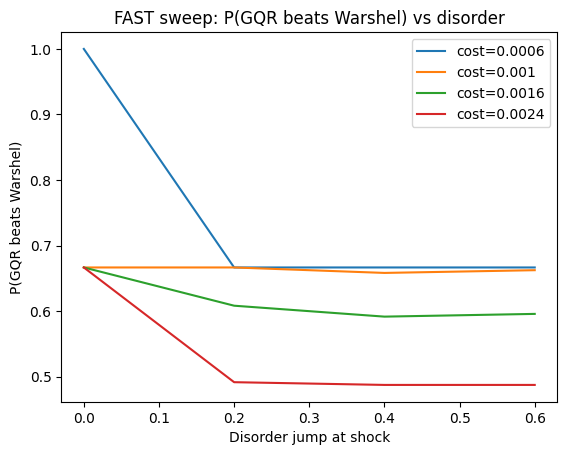

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# FAST SWEEP (chunked simulation)
# =============================
SEED0 = 123
rng_master = np.random.default_rng(SEED0)

N_PATHS = 50
PRODUCT_IDX = 0

# Chunked events
EVENTS = 80_000
CHUNK = 1_000
N_CHUNKS = EVENTS // CHUNK

# Shock schedule (step disorder at 25%)
SHOCK_AT_CHUNK = int(0.25 * N_CHUNKS)
BETA = 2.2

# Replication (start smaller; scale later)
N_LANDSCAPES = 20
N_SEEDS_PER_LAND = 4

# Sweeps (small first; expand later)
DISORDER_JUMPS = np.array([0.0, 0.2, 0.4, 0.6])
GQR_FILTER_COSTS = np.array([0.0006, 0.0010, 0.0016, 0.0024])
GQR_EARN_SCALES = np.array([0.010, 0.030, 0.050])

# Warshel shaping
WARSHEL_LOWER_PRODUCT = 0.25
WARSHEL_RAISE_WASTE = 0.05
WARSHEL_DISSIPATION_REDUCE = 0.05

# GQR parameters
GQR_FILTER_BASE = 0.90
GQR_BUDGET0 = 2.0
GQR_BUDGET_MIN = -2.0
GQR_BUDGET_MAX = 4.0

OUTFILE = "/content/enz_phase_sweep_results_fast.npz"

def gqr_effective_filter(filter_setting, disorder, budget):
    eff = filter_setting * max(0.0, 1.0 - disorder)
    if budget < 0:
        frac = max(0.0, (budget - GQR_BUDGET_MIN) / (0.0 - GQR_BUDGET_MIN))
        eff *= frac
    return float(np.clip(eff, 0.0, 1.0))

def softmax_weights(x):
    w = np.exp(x - np.max(x))
    return w / w.sum()

def weights_arrhenius(barriers):
    return softmax_weights(-BETA * barriers)

def weights_marcus(barriers, reorg):
    return softmax_weights(-BETA * (barriers + reorg))

def weights_warshel(barriers):
    b = barriers.copy()
    b[PRODUCT_IDX] = max(0.0, b[PRODUCT_IDX] - WARSHEL_LOWER_PRODUCT)
    b[1:] = b[1:] + WARSHEL_RAISE_WASTE
    return softmax_weights(-BETA * b)

def weights_gqr(barriers, filter_eff):
    w = np.exp(-BETA * barriers)
    w[1:] *= (1.0 - filter_eff)
    s = w.sum()
    return (w / s) if s > 0 else np.ones_like(w) / len(w)

def run_once_chunked(barriers, reorg, dissipation, disorder_jump, gqr_filter_cost, gqr_earn_scale, seed):
    rng = np.random.default_rng(seed)

    w_arr = weights_arrhenius(barriers)
    w_mar = weights_marcus(barriers, reorg)
    w_war = weights_warshel(barriers)

    # Precompute per-path dissipation for Warshel (slightly reduced)
    diss_warshel = dissipation.copy()
    diss_warshel = np.maximum(0.0, diss_warshel - WARSHEL_DISSIPATION_REDUCE)

    prod = np.zeros(4, dtype=float)
    waste = np.zeros(4, dtype=float)
    diss = np.zeros(4, dtype=float)

    disorder = 0.0
    budget = GQR_BUDGET0

    for c in range(N_CHUNKS):
        if c == SHOCK_AT_CHUNK:
            disorder = float(np.clip(disorder + disorder_jump, 0.0, 0.95))

        # --- Arrhenius (multinomial chunk) ---
        counts = rng.multinomial(CHUNK, w_arr)
        prod[0] += counts[PRODUCT_IDX]
        waste[0] += (CHUNK - counts[PRODUCT_IDX])
        diss[0] += float((counts * dissipation).sum())

        # --- Marcus ---
        counts = rng.multinomial(CHUNK, w_mar)
        prod[1] += counts[PRODUCT_IDX]
        waste[1] += (CHUNK - counts[PRODUCT_IDX])
        diss[1] += float((counts * dissipation).sum())

        # --- Warshel ---
        counts = rng.multinomial(CHUNK, w_war)
        prod[2] += counts[PRODUCT_IDX]
        waste[2] += (CHUNK - counts[PRODUCT_IDX])
        diss[2] += float((counts * diss_warshel).sum())

        # --- GQR (dynamic weights each chunk) ---
        filter_eff = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
        w_g = weights_gqr(barriers, filter_eff)
        counts = rng.multinomial(CHUNK, w_g)

        got_prod = float(counts[PRODUCT_IDX])
        prod[3] += got_prod
        waste[3] += (CHUNK - counts[PRODUCT_IDX])
        diss_chunk = float((counts * dissipation).sum())
        diss[3] += diss_chunk

        # Budget update (approx): spend depends on filter_eff per event
        spend = CHUNK * ((gqr_filter_cost * filter_eff) + 0.0003)

        # Earn depends on product count * average (1.2 - diss) for product events
        # Approx product dissipation per event:
        d_prod = dissipation[PRODUCT_IDX]
        earn = gqr_earn_scale * got_prod * max(0.0, 1.2 - d_prod)

        budget = float(np.clip(budget + earn - spend, GQR_BUDGET_MIN, GQR_BUDGET_MAX))

    y = prod / np.maximum(1.0, prod + waste)
    dpp = diss / np.maximum(1.0, prod)
    final_filter = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
    gqr_dead = 1 if final_filter < 0.05 else 0
    return y, dpp, budget, final_filter, gqr_dead

# =============================
# Run sweep with heartbeat + autosave
# =============================
cols = [
    "landscape","seed_idx","disorder_jump","gqr_filter_cost","gqr_earn_scale",
    "y_arr","y_mar","y_war","y_gqr",
    "dpp_arr","dpp_mar","dpp_war","dpp_gqr",
    "gqr_final_budget","gqr_final_filter","gqr_dead"
]

rows = []
run_count = 0
t0 = time.time()
last_beat = time.time()
last_save = time.time()

total_runs = N_LANDSCAPES * N_SEEDS_PER_LAND * len(DISORDER_JUMPS) * len(GQR_FILTER_COSTS) * len(GQR_EARN_SCALES)
print(f"FAST sweep starting: total_runs={total_runs}, EVENTS={EVENTS}, CHUNK={CHUNK}, landscapes={N_LANDSCAPES}, seeds/land={N_SEEDS_PER_LAND}")

for L in range(N_LANDSCAPES):
    # landscape draw
    barriers = np.clip(rng_master.normal(1.2, 0.25, size=N_PATHS), 0.3, 2.2)
    barriers[PRODUCT_IDX] = 0.95
    reorg = np.clip(rng_master.normal(0.35, 0.10, size=N_PATHS), 0.05, 0.8)
    reorg[PRODUCT_IDX] = 0.20
    dissipation = np.clip(rng_master.normal(1.0, 0.25, size=N_PATHS), 0.2, 2.0)
    dissipation[PRODUCT_IDX] = 0.75

    for s in range(N_SEEDS_PER_LAND):
        seed = int(rng_master.integers(1, 2**31 - 1))
        for dj in DISORDER_JUMPS:
            for fc in GQR_FILTER_COSTS:
                for es in GQR_EARN_SCALES:
                    y, dpp, bud, filt, dead = run_once_chunked(barriers, reorg, dissipation, dj, fc, es, seed)
                    rows.append([L, s, dj, fc, es,
                                 y[0], y[1], y[2], y[3],
                                 dpp[0], dpp[1], dpp[2], dpp[3],
                                 bud, filt, dead])
                    run_count += 1

                    now = time.time()
                    if now - last_beat > 10:
                        dt = now - t0
                        print(f"runs={run_count:6d}/{total_runs} ({run_count/total_runs:5.1%}) elapsed={dt:6.1f}s")
                        last_beat = now

                    if now - last_save > 20:
                        arr = np.array(rows, dtype=float)
                        np.savez(OUTFILE, rows=arr, columns=np.array(cols))
                        last_save = now

arr = np.array(rows, dtype=float)
np.savez(OUTFILE, rows=arr, columns=np.array(cols))
print(f"\nSaved sweep to: {OUTFILE}")

# =============================
# Quick plot: P(GQR beats Warshel)
# =============================
y_gqr = arr[:, 8]
y_war = arr[:, 7]
dpp_gqr = arr[:, 12]
dpp_war = arr[:, 11]
dead = arr[:, 15]

gqr_wins = (y_gqr > y_war) & (dpp_gqr < dpp_war) & (dead < 0.5)

plt.figure()
for fc in GQR_FILTER_COSTS:
    mask_fc = np.isclose(arr[:,3], fc)
    win_rates = []
    for dj in DISORDER_JUMPS:
        m = mask_fc & np.isclose(arr[:,2], dj)
        win_rates.append(gqr_wins[m].mean() if m.any() else np.nan)
    plt.plot(DISORDER_JUMPS, win_rates, label=f"cost={fc:g}")
plt.xlabel("Disorder jump at shock")
plt.ylabel("P(GQR beats Warshel)")
plt.title("FAST sweep: P(GQR beats Warshel) vs disorder")
plt.legend()
plt.show()


=== N_PATHS=50 | total_runs=8640 | EVENTS=80000 CHUNK=1000 ===
  progress: N_PATHS=50 runs=   925/8640 (10.7%) elapsed=  10.0s
  progress: N_PATHS=50 runs=  2158/8640 (25.0%) elapsed=  20.0s
  progress: N_PATHS=50 runs=  3353/8640 (38.8%) elapsed=  30.0s
  progress: N_PATHS=50 runs=  4494/8640 (52.0%) elapsed=  40.0s
  progress: N_PATHS=50 runs=  5666/8640 (65.6%) elapsed=  50.0s
  progress: N_PATHS=50 runs=  6805/8640 (78.8%) elapsed=  60.0s
  progress: N_PATHS=50 runs=  8053/8640 (93.2%) elapsed=  70.0s
Saved: /content/enz_pathsweep_N50.npz  (rows=8640)

=== N_PATHS=200 | total_runs=8640 | EVENTS=80000 CHUNK=1000 ===
  progress: N_PATHS=200 runs=   330/8640 ( 3.8%) elapsed=  80.1s
  progress: N_PATHS=200 runs=  1008/8640 (11.7%) elapsed=  90.1s
  progress: N_PATHS=200 runs=  1697/8640 (19.6%) elapsed= 100.1s
  progress: N_PATHS=200 runs=  2367/8640 (27.4%) elapsed= 110.1s
  progress: N_PATHS=200 runs=  3093/8640 (35.8%) elapsed= 120.1s
  progress: N_PATHS=200 runs=  3781/8640 (43.8%

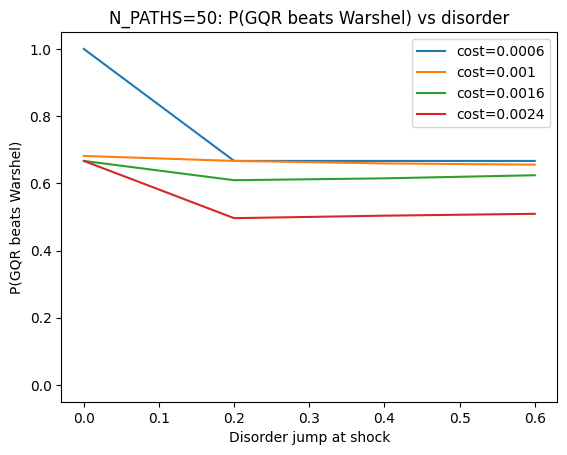

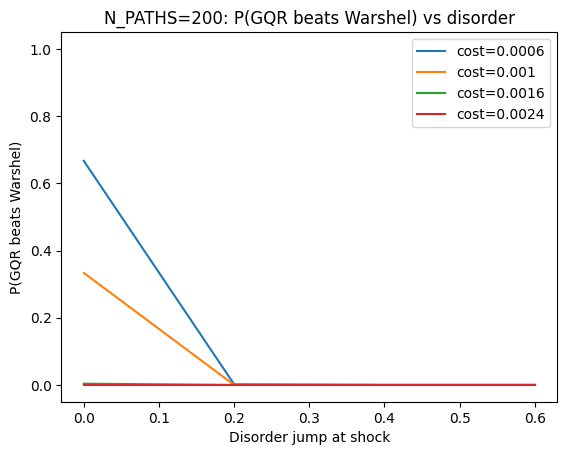

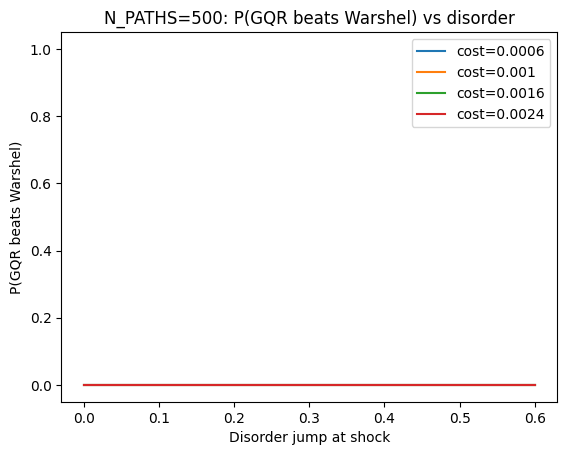

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================
# FAST chunked sweep: scaling with N_PATHS
# =============================
SEED0 = 123
rng_master = np.random.default_rng(SEED0)

# ---- scaling target (the falsifier) ----
N_PATHS_LIST = [50, 200, 500]      # key falsifier: does GQR win region vanish as decoys explode?

PRODUCT_IDX = 0

# Chunked simulation
EVENTS = 80_000
CHUNK = 1_000
N_CHUNKS = EVENTS // CHUNK

# Shock schedule: single step disorder at 25%
SHOCK_AT_CHUNK = int(0.25 * N_CHUNKS)

# Thermodynamic sensitivity
BETA = 2.2

# Replication (tune up for paper-grade)
N_LANDSCAPES = 60
N_SEEDS_PER_LAND = 3

# Sweep grid (keep moderate; expand later if needed)
DISORDER_JUMPS = np.array([0.0, 0.2, 0.4, 0.6])
GQR_FILTER_COSTS = np.array([0.0006, 0.0010, 0.0016, 0.0024])
GQR_EARN_SCALES = np.array([0.010, 0.030, 0.050])

# Warshel shaping
WARSHEL_LOWER_PRODUCT = 0.25
WARSHEL_RAISE_WASTE = 0.05
WARSHEL_DISSIPATION_REDUCE = 0.05

# GQR parameters
GQR_FILTER_BASE = 0.90
GQR_BUDGET0 = 2.0
GQR_BUDGET_MIN = -2.0
GQR_BUDGET_MAX = 4.0

# Progress + autosave
HEARTBEAT_SECONDS = 10
AUTOSAVE_SECONDS = 25
OUTFILE_PREFIX = "/content/enz_pathsweep"

def gqr_effective_filter(filter_setting, disorder, budget):
    eff = filter_setting * max(0.0, 1.0 - disorder)
    if budget < 0:
        frac = max(0.0, (budget - GQR_BUDGET_MIN) / (0.0 - GQR_BUDGET_MIN))
        eff *= frac
    return float(np.clip(eff, 0.0, 1.0))

def softmax_weights(x):
    w = np.exp(x - np.max(x))
    return w / w.sum()

def weights_arrhenius(barriers):
    return softmax_weights(-BETA * barriers)

def weights_marcus(barriers, reorg):
    return softmax_weights(-BETA * (barriers + reorg))

def weights_warshel(barriers):
    b = barriers.copy()
    b[PRODUCT_IDX] = max(0.0, b[PRODUCT_IDX] - WARSHEL_LOWER_PRODUCT)
    b[1:] = b[1:] + WARSHEL_RAISE_WASTE
    return softmax_weights(-BETA * b)

def weights_gqr(barriers, filter_eff):
    w = np.exp(-BETA * barriers)
    w[1:] *= (1.0 - filter_eff)
    s = w.sum()
    return (w / s) if s > 0 else np.ones_like(w) / len(w)

def run_once_chunked(barriers, reorg, dissipation, disorder_jump, gqr_filter_cost, gqr_earn_scale, seed):
    rng = np.random.default_rng(seed)

    w_arr = weights_arrhenius(barriers)
    w_mar = weights_marcus(barriers, reorg)
    w_war = weights_warshel(barriers)

    diss_warshel = np.maximum(0.0, dissipation - WARSHEL_DISSIPATION_REDUCE)

    prod = np.zeros(4, dtype=float)  # arr, marcus, warshel, gqr
    waste = np.zeros(4, dtype=float)
    diss = np.zeros(4, dtype=float)

    disorder = 0.0
    budget = GQR_BUDGET0

    d_prod = float(dissipation[PRODUCT_IDX])

    for c in range(N_CHUNKS):
        if c == SHOCK_AT_CHUNK:
            disorder = float(np.clip(disorder + disorder_jump, 0.0, 0.95))

        # Arrhenius
        counts = rng.multinomial(CHUNK, w_arr)
        prod[0] += counts[PRODUCT_IDX]
        waste[0] += (CHUNK - counts[PRODUCT_IDX])
        diss[0] += float((counts * dissipation).sum())

        # Marcus
        counts = rng.multinomial(CHUNK, w_mar)
        prod[1] += counts[PRODUCT_IDX]
        waste[1] += (CHUNK - counts[PRODUCT_IDX])
        diss[1] += float((counts * dissipation).sum())

        # Warshel
        counts = rng.multinomial(CHUNK, w_war)
        prod[2] += counts[PRODUCT_IDX]
        waste[2] += (CHUNK - counts[PRODUCT_IDX])
        diss[2] += float((counts * diss_warshel).sum())

        # GQR (dynamic)
        filter_eff = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
        w_g = weights_gqr(barriers, filter_eff)
        counts = rng.multinomial(CHUNK, w_g)

        got_prod = float(counts[PRODUCT_IDX])
        prod[3] += got_prod
        waste[3] += (CHUNK - counts[PRODUCT_IDX])
        diss_chunk = float((counts * dissipation).sum())
        diss[3] += diss_chunk

        spend = CHUNK * ((gqr_filter_cost * filter_eff) + 0.0003)
        earn = gqr_earn_scale * got_prod * max(0.0, 1.2 - d_prod)
        budget = float(np.clip(budget + earn - spend, GQR_BUDGET_MIN, GQR_BUDGET_MAX))

    y = prod / np.maximum(1.0, prod + waste)
    dpp = diss / np.maximum(1.0, prod)
    final_filter = gqr_effective_filter(GQR_FILTER_BASE, disorder, budget)
    gqr_dead = 1 if final_filter < 0.05 else 0
    return y, dpp, budget, final_filter, gqr_dead

COLS = [
    "n_paths","landscape","seed_idx","disorder_jump","gqr_filter_cost","gqr_earn_scale",
    "y_arr","y_mar","y_war","y_gqr",
    "dpp_arr","dpp_mar","dpp_war","dpp_gqr",
    "gqr_final_budget","gqr_final_filter","gqr_dead"
]

def autosave_npz(path, rows):
    arr = np.array(rows, dtype=float)
    np.savez(path, rows=arr, columns=np.array(COLS))

# =============================
# Sweep loop (per N_PATHS)
# =============================
all_rows = []
t0 = time.time()
last_beat = t0
last_save = t0

for N_PATHS in N_PATHS_LIST:
    total_runs = N_LANDSCAPES * N_SEEDS_PER_LAND * len(DISORDER_JUMPS) * len(GQR_FILTER_COSTS) * len(GQR_EARN_SCALES)
    print(f"\n=== N_PATHS={N_PATHS} | total_runs={total_runs} | EVENTS={EVENTS} CHUNK={CHUNK} ===")

    run_count = 0
    rows = []

    for L in range(N_LANDSCAPES):
        # landscape draw
        barriers = np.clip(rng_master.normal(1.2, 0.25, size=N_PATHS), 0.3, 2.2)
        barriers[PRODUCT_IDX] = 0.95
        reorg = np.clip(rng_master.normal(0.35, 0.10, size=N_PATHS), 0.05, 0.8)
        reorg[PRODUCT_IDX] = 0.20
        dissipation = np.clip(rng_master.normal(1.0, 0.25, size=N_PATHS), 0.2, 2.0)
        dissipation[PRODUCT_IDX] = 0.75

        for s in range(N_SEEDS_PER_LAND):
            seed = int(rng_master.integers(1, 2**31 - 1))

            for dj in DISORDER_JUMPS:
                for fc in GQR_FILTER_COSTS:
                    for es in GQR_EARN_SCALES:
                        y, dpp, bud, filt, dead = run_once_chunked(barriers, reorg, dissipation, dj, fc, es, seed)
                        rows.append([
                            N_PATHS, L, s, dj, fc, es,
                            y[0], y[1], y[2], y[3],
                            dpp[0], dpp[1], dpp[2], dpp[3],
                            bud, filt, dead
                        ])
                        run_count += 1

                        now = time.time()
                        if now - last_beat > HEARTBEAT_SECONDS:
                            dt = now - t0
                            print(f"  progress: N_PATHS={N_PATHS} runs={run_count:6d}/{total_runs} ({run_count/total_runs:5.1%}) elapsed={dt:6.1f}s")
                            last_beat = now

                        if now - last_save > AUTOSAVE_SECONDS:
                            autosave_npz(f"{OUTFILE_PREFIX}_partial.npz", all_rows + rows)
                            last_save = now

    # Save per-N_PATHS
    perfile = f"{OUTFILE_PREFIX}_N{N_PATHS}.npz"
    autosave_npz(perfile, rows)
    print(f"Saved: {perfile}  (rows={len(rows)})")

    all_rows += rows

# Save combined
combined = f"{OUTFILE_PREFIX}_ALL.npz"
autosave_npz(combined, all_rows)
print(f"\nSaved combined: {combined} (rows={len(all_rows)})")

# =============================
# Plot: P(GQR beats Warshel) vs disorder, per N_PATHS, grouped by filter cost
# =============================
arr = np.array(all_rows, dtype=float)
ci = {c:i for i,c in enumerate(COLS)}
npaths = arr[:, ci["n_paths"]]
dj = arr[:, ci["disorder_jump"]]
fc = arr[:, ci["gqr_filter_cost"]]

y_war = arr[:, ci["y_war"]]
y_gqr = arr[:, ci["y_gqr"]]
dpp_war = arr[:, ci["dpp_war"]]
dpp_gqr = arr[:, ci["dpp_gqr"]]
dead = arr[:, ci["gqr_dead"]]

gqr_wins = (y_gqr > y_war) & (dpp_gqr < dpp_war) & (dead < 0.5)

for N_PATHS in N_PATHS_LIST:
    plt.figure()
    for cost in GQR_FILTER_COSTS:
        mask = (npaths == N_PATHS) & np.isclose(fc, cost)
        rates = []
        for d in DISORDER_JUMPS:
            m = mask & np.isclose(dj, d)
            rates.append(gqr_wins[m].mean() if m.any() else np.nan)
        plt.plot(DISORDER_JUMPS, rates, label=f"cost={cost:g}")
    plt.xlabel("Disorder jump at shock")
    plt.ylabel("P(GQR beats Warshel)")
    plt.title(f"N_PATHS={N_PATHS}: P(GQR beats Warshel) vs disorder")
    plt.ylim(-0.05, 1.05)
    plt.legend()
    plt.show()